# Main Assignment 

In [5]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import pandas_profiling


import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve

from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import text #Allow stop_words customization
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from scipy import stats
from time import time



In [6]:
def util_plot(dataset, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    dataset[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], dist="norm", plot=plt)

    plt.show()

def plot_categories(dataset, variable):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(dataset.index, dataset[variable], rotation=90)

    ax2 = ax.twinx()
    ax.bar(dataset.index, dataset["perc_data"], color='lightgrey')
    ax2.plot(dataset.index, dataset["price"], color='green', label='Seconds')
    ax.axhline(y=5, color='red')
    ax.set_ylabel('percentage per category')
    ax.set_xlabel(variable)
    ax2.set_ylabel('Average Price')
    plt.show()

In [7]:
data=pd.read_csv('./winemag-data-130k-v2.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
data=data.drop(columns=['Unnamed: 0'])
print(data.shape)
data.isnull().sum()

(129971, 13)


country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [9]:
print('Number of unique categories in the variable country: {}'.format(len(data.country.unique())))
print(data.country.nunique()) # doesnt consider NAN

Number of unique categories in the variable country: 44
43


### Countrywise Distribution of records

Text(0, 0.5, 'Percentage of records')

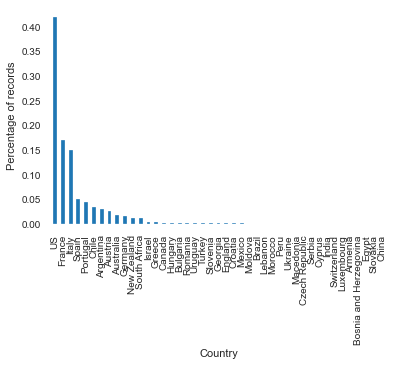

In [10]:
total_records = len(data)
temp_df = pd.Series(data.country.value_counts() / total_records)
fig = temp_df.sort_values(ascending=False).plot.bar()
fig.set_xlabel('Country')
fig.set_ylabel('Percentage of records')

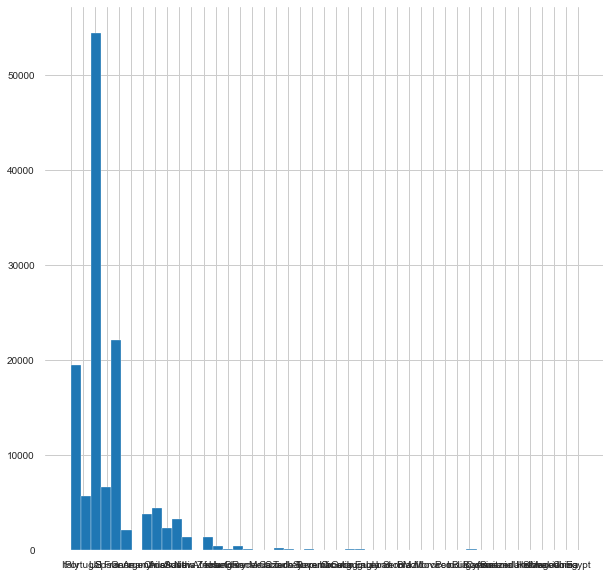

In [11]:
# plot histogram for understanding the distribution
data.country.hist(bins=50, figsize=(10,10))
plt.show()

Missing Data in Country Count  63
Missing Data in Country %  0.05
Number of unique categories in the variable Country: 44
43
Mean Price of wine per country 

                    country  perc_data      price
0                       US  41.935509  36.573464
1                   France  16.998407  41.139120
2                    Italy  15.034123  39.663770
3                    Spain   5.112679  28.215275
4                 Portugal   4.378669  26.218256
5                    Chile   3.440768  20.786458
6                Argentina   2.923729  24.510117
7                  Austria   2.573651  30.762772
8                Australia   1.791938  35.437663
9                  Germany   1.665756  42.257547
10             New Zealand   1.091782  26.931785
11            South Africa   1.077933  24.668987
12                  Israel   0.388548  31.768916
13                  Greece   0.358542  22.364425
14                  Canada   0.197736  35.712598
15                 Hungary   0.112333  40.648276
16      

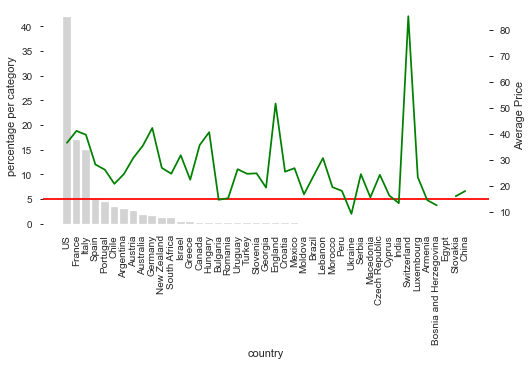

Text(0, 0.5, 'Count of country')

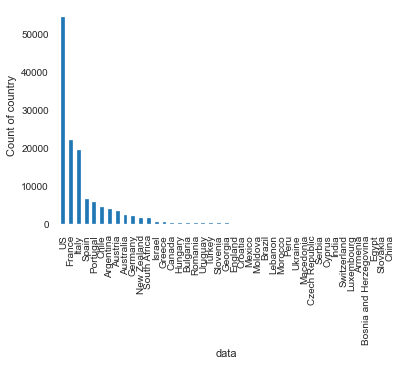

In [12]:
print("Missing Data in Country Count ", np.around(data['country'].isnull().sum()))
print("Missing Data in Country % ", np.around(data['country'].isnull().mean()*100, decimals = 2))
print('Number of unique categories in the variable Country: {}'.format(len(data['country'].unique())))
print(data['country'].nunique()) # doesnt consider NAN



temp_df = pd.Series(data.country.value_counts() / total_records*100).reset_index()
temp_df.columns = ['country', 'perc_data']


temp_df = temp_df.merge(data.groupby(['country'])['price'].mean().reset_index(),
                            on='country',
                            how='left')
print("Mean Price of wine per country \n\n", temp_df)

plot_categories(temp_df, 'country')

data['country'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('data')
plt.ylabel('Count of country')


Mean Price of wine per country 

                    country  perc_data     points
0                       US  41.935509  88.563720
1                   France  16.998407  88.845109
2                    Italy  15.034123  88.562231
3                    Spain   5.112679  87.288337
4                 Portugal   4.378669  88.250220
5                    Chile   3.440768  86.493515
6                Argentina   2.923729  86.710263
7                  Austria   2.573651  90.101345
8                Australia   1.791938  88.580507
9                  Germany   1.665756  89.851732
10             New Zealand   1.091782  88.303030
11            South Africa   1.077933  88.056388
12                  Israel   0.388548  88.471287
13                  Greece   0.358542  87.283262
14                  Canada   0.197736  89.369650
15                 Hungary   0.112333  89.191781
16                Bulgaria   0.108486  87.936170
17                 Romania   0.092328  86.400000
18                 Uruguay   0.0838

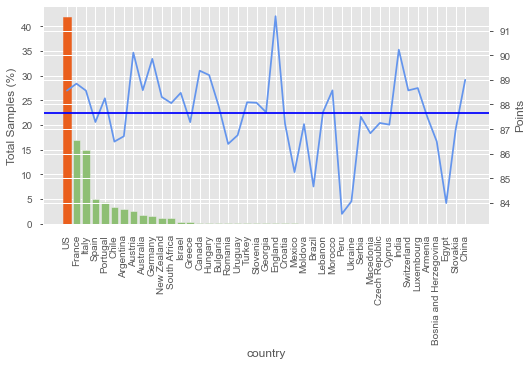

In [13]:
import matplotlib.style as style
style.use('ggplot')

def util_plot(dataset, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    dataset[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], dist="norm", plot=plt)

    plt.show()

def plot_categories(dataset, variable):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(dataset.index, dataset[variable], rotation=90)

    ax2 = ax.twinx()
    b = ax.bar(dataset.index, dataset["perc_data"], color='#8ebf74')
    b[0].set_color('#ea5f1d')
    ax2.plot(dataset.index, dataset["points"], color='cornflowerblue')
    ax2.axhline(y=dataset.points.mean(), color='blue')
    ax.set_ylabel('Total Samples (%)')
    ax.set_xlabel(variable)
    ax2.set_ylabel('Points')
    plt.savefig('test1.svg', bbox_inches='tight')
    plt.show()
    
temp_df = pd.Series(data.country.value_counts() / total_records*100).reset_index()
temp_df.columns = ['country', 'perc_data']


temp_df = temp_df.merge(data.groupby(['country'])['points'].mean().reset_index(),
                            on='country',
                            how='left')
print("Mean Price of wine per country \n\n", temp_df)

print(temp_df.points.mean())
plot_categories(temp_df, 'country')

In [14]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
region_2,79460,61.136715
designation,37465,28.825661
taster_twitter_handle,31213,24.015357
taster_name,26244,20.192197
region_1,21247,16.347493
price,8996,6.921544
province,63,0.048472
country,63,0.048472
variety,1,0.000769
winery,0,0.000000


# Score

Text(0, 0.5, 'Percentage of records')

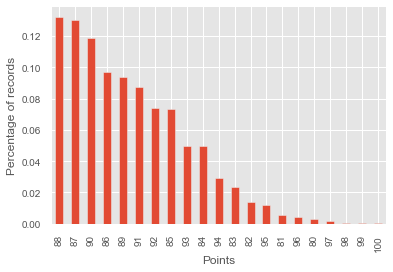

In [15]:
total_records = len(data)
temp_df = pd.Series(data.points.value_counts() / total_records)
fig = temp_df.sort_values(ascending=False).plot.bar()
fig.set_xlabel('Points')
fig.set_ylabel('Percentage of records')

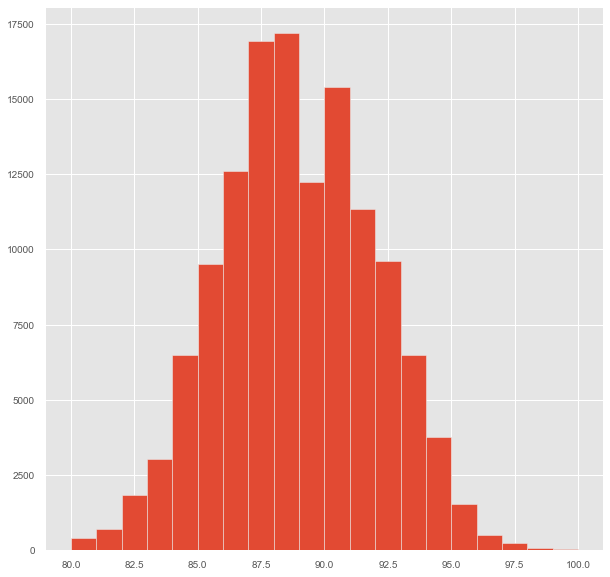

In [16]:
# plot histogram for understanding the distribution
data.points.hist(bins=20, figsize=(10,10))
plt.show()


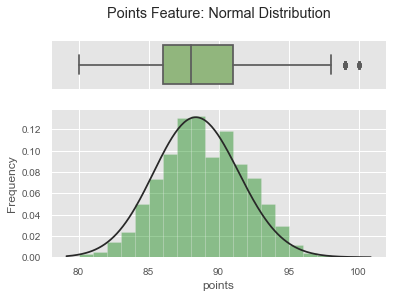

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)})
legend=["Frequency Distribution of samples for each points"]
#Associate a plot to each of the subplot grid
sns.boxplot(data["points"], ax=ax_box, color='#8ebf74').set_title("Points Feature: Normal Distribution\n")
sns.distplot(data["points"], color='green',ax=ax_hist, kde=False, fit=stats.gamma, bins=20) 
#We can fit a gamma distribution, just for the sake of representation.
 
#Set axes legends
ax_box.set(xlabel='') #Remove x axis name for the boxplot
ax_hist.set(ylabel='Frequency')
#plt.legend(legend)
plt.savefig('test.svg', bbox_inches='tight')
plt.show()
#palette=sns.light_palette("green")

In [18]:
Q3 = np.quantile(data['points'], 0.75) #Third quartile
Q1 = np.quantile(data['points'], 0.25) #First quartile
IQR = Q3 - Q1 #Inter Quartile Range

outlier_score_threshold =  Q3 + 1.5 * IQR
outlier_number=len(data[data['points'] > outlier_score_threshold ])

print("Number of outliers:", outlier_number,
      "\nOutlier proportion:", round(outlier_number/len(data['points'])*100, 3),"%",
      "\nOutlier threshold score:", outlier_score_threshold,"/ 100")

Number of outliers: 52 
Outlier proportion: 0.04 % 
Outlier threshold score: 98.5 / 100


# Description: length

In [19]:
data = data.assign(description_length = data['description'].apply(len))

In [20]:
data.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_length
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,172


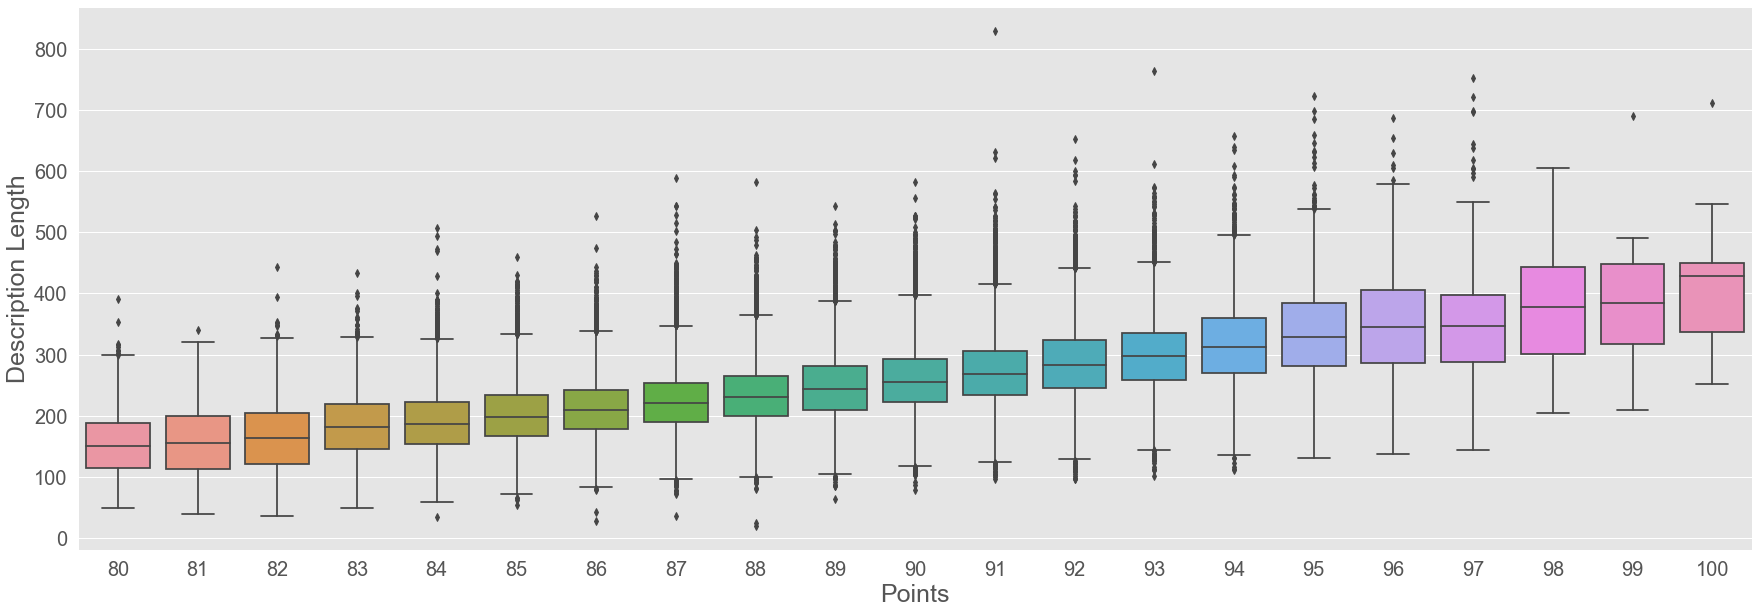

In [21]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='description_length', data=data)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
#ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Description Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.savefig('test2.svg', bbox_inches='tight')
plt.show()

Mean Price of wine per country 

     points  perc_data  description_length
0       88  13.239107          234.161039
1       87  13.028291          223.738735
2       90  11.856491          259.225698
3       86   9.694470          212.450238
4       89   9.406714          247.276215
5       91   8.739642          272.629457
6       92   7.396265          286.918132
7       85   7.332405          202.166527
8       93   4.992652          299.655571
9       84   4.985728          191.532253
10      94   2.891414          316.579297
11      83   2.327442          184.115702
12      82   1.412623          165.656318
13      95   1.181033          335.336808
14      81   0.532426          158.158960
15      96   0.402397          351.577438
16      80   0.305453          155.201511
17      97   0.176193          355.681223
18      98   0.059244          376.584416
19      99   0.025390          380.000000
20     100   0.014619          417.736842


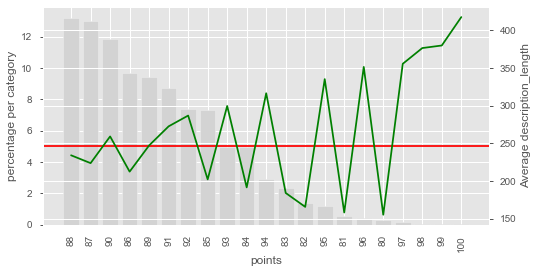

Text(0, 0.5, 'Count of points')

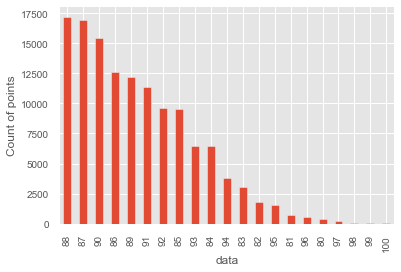

In [22]:
def plot_categories(dataset, variable):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(dataset.index, dataset[variable], rotation=90)

    ax2 = ax.twinx()
    ax.bar(dataset.index, dataset["perc_data"], color='lightgrey')
    ax2.plot(dataset.index, dataset["description_length"], color='green', label='Seconds')
    ax.axhline(y=5, color='red')
    ax.set_ylabel('percentage per category')
    ax.set_xlabel(variable)
    ax2.set_ylabel('Average description_length')
    plt.show()
    
temp_df = pd.Series(data.points.value_counts() / total_records*100).reset_index()
temp_df.columns = ['points', 'perc_data']


temp_df = temp_df.merge(data.groupby(['points'])['description_length'].mean().reset_index(),
                            on='points',
                            how='left')
print("Mean Price of wine per country \n\n", temp_df)

plot_categories(temp_df, 'points')

data['points'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('data')
plt.ylabel('Count of points')

In [23]:
data.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_length
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,172


In [24]:
"""
from feature_engine import missing_data_imputers as mdi
imputer = mdi.MeanMedianImputer(imputation_method='median',
                                variables=['price'])
imputer.fit(data)
data = imputer.transform(data)
"""
og_data = data.copy()
data.price = data.price.fillna(data.price.mean())
data.price.isnull().sum()

0

df=data.fillna("missing")
target=df['points']
df=df.drop(columns=['points', 'description'])
traindata = df
traindata = pd.get_dummies(traindata, 
                            columns=['country', 'designation','province','region_1','region_2', 'taster_name','taster_twitter_handle', 'title', 'variety', 'winery'],
                           prefix_sep='_', drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(traindata,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=0)

In [25]:
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor, cv
data.price = data.price.fillna(data.price.mean())
df=data.fillna("missing")

y = df['points']
X=df.drop(columns=['points', 'description'])


categorical_features_indices =[0,1, 3,4,5,6,7,8,9,10]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, 
                                                    random_state=52)


In [26]:
categorical_features_indices

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10]

In [27]:
def perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test):
    model = CatBoostRegressor(
        random_seed = 400,
        loss_function = 'RMSE',
        iterations=400,
    )
    
    model.fit(
        X_train, y_train,
        cat_features = categorical_features_indices,
        eval_set=(X_valid, y_valid),
        verbose=False
    )
    
    print("RMSE on training data: "+ model.score(X_train, y_train).astype(str))
    print("RMSE on test data: "+ model.score(X_test, y_test).astype(str))
    
    return model

In [28]:
model=perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test)

RMSE on training data: 0.788186253957908
RMSE on test data: 0.6761524590067178


In [29]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

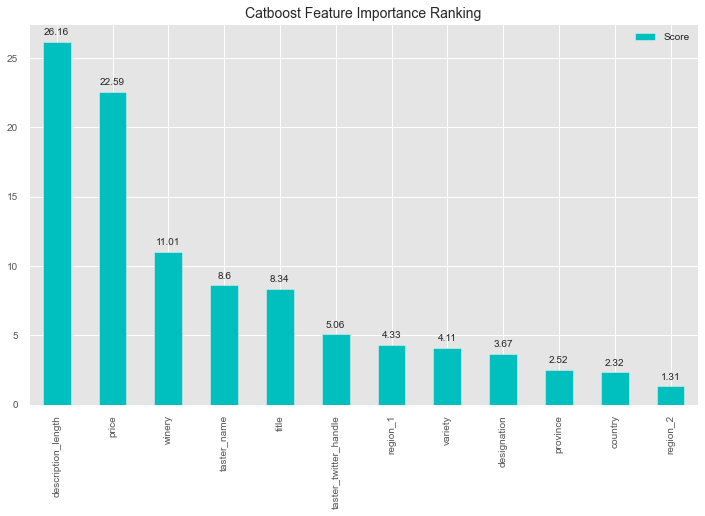

In [30]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

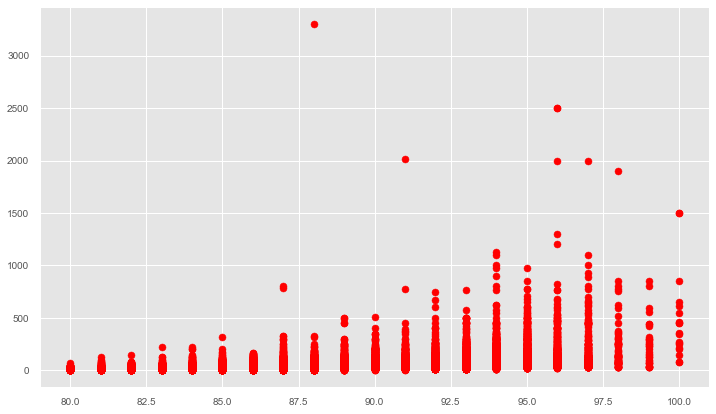

In [31]:
plt.scatter(data['points'], data["price"], color= 'red')

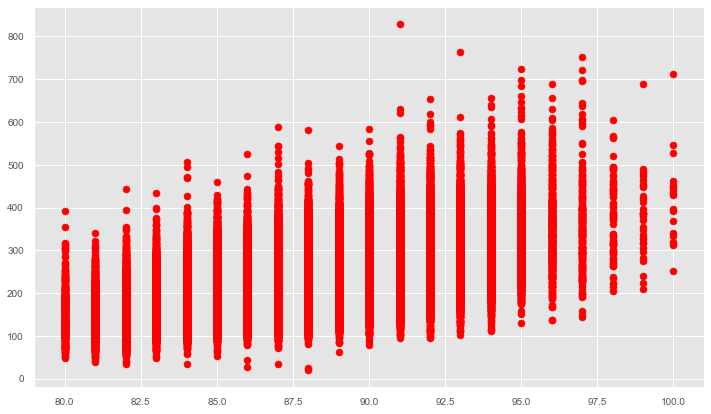

In [32]:
plt.scatter(data['points'], data["description_length"], color= 'red')

In [33]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.price.values.reshape(-1,1), y_train.values.reshape(-1,1))

# Make predictions using the testing set
preds = regr.predict(X_test.price.values.reshape(-1,1))

# The R mean squared error
import math
print('Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test, preds)))

Mean squared error: 2.82


In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.description_length.values.reshape(-1,1), y_train.values.reshape(-1,1))

# Make predictions using the testing set
preds = regr.predict(X_test.description_length.values.reshape(-1,1))

# The R mean squared error
import math
print('Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test, preds)))

Mean squared error: 2.54


In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()


X_train_1 = X_train[['price','description_length']]
X_test_1 = X_test[['price','description_length']]

# Train the model using the training sets
regr.fit(X_train_1, y_train.values.reshape(-1,1))

# Make predictions using the testing set
preds = regr.predict(X_test_1)

# The R mean squared error
import math
print('Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test, preds)))


Mean squared error: 2.40


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

df=data.fillna("missing")


target=df['points']

df=df.drop(columns=['points', 'description', 'country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety'])
traindata = df
traindata = pd.get_dummies(traindata, 
                            columns=['winery'],
                           prefix_sep='_', drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(traindata,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=0)

# Train the model using the training sets
regr.fit(X_train, y_train.values.reshape(-1,1))

# Make predictions using the testing set
preds = regr.predict(X_test)

# The R mean squared error
import math
print('Mean squared error: %.2f'
      % math.sqrt(mean_squared_error(y_test, preds)))

In [36]:
italy_wines = data.loc[data['country'] == 'Italy']

In [37]:
print(italy_wines.shape)
print(italy_wines.region_2.isnull().sum())
print(italy_wines.region_1.nunique())
italy_wines.head(2)

(19540, 14)
19540
381


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_length
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,172
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.000000,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,181


In [38]:
italy_wines_less_than_20_euro = italy_wines.loc[italy_wines['price'] < 20]
print(italy_wines_less_than_20_euro.shape)

(4895, 14)


In [39]:
italy_wines_less_than_20_euro['region_1'].value_counts() >= 4

Sicilia                                         True
Toscana                                         True
Chianti Classico                                True
Alto Adige                                      True
Conegliano Valdobbiadene Prosecco Superiore     True
                                               ...  
Est! Est!! Est!!! di Montefiascone             False
Abruzzo                                        False
Frascati                                       False
Lambrusco Salamino di Santa Croce              False
Aglianico del Beneventano                      False
Name: region_1, Length: 274, dtype: bool

In [40]:
italy_data = italy_wines_less_than_20_euro.groupby('region_1').filter(lambda x: len(x) >= 4)

In [41]:
df = italy_wines_less_than_20_euro.copy()
italy_data = df[df['region_1'].isin(df['region_1'].value_counts()[df['region_1'].value_counts()>=4].index)]

In [42]:
italy_data.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_length
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,181


In [43]:
#removing sardiania region (region_1 !="Sardinia")
italy_data = italy_data.loc[(italy_data['region_1'] != 'Sardinia')]

In [44]:
average_rating = italy_data.points.mean()
print(average_rating)

86.58507462686568


In [45]:
average_rating = italy_data.points.std()
print(average_rating)

1.7032175855466078


In [46]:
italy_data.region_1.nunique()

161

In [47]:
italy_data.shape

(4690, 14)

In [48]:
italy_data.groupby('region_1')['points'].mean() > average_rating

region_1
Aglianico del Vulture           True
Alcamo                          True
Alto Adige                      True
Alto Adige Valle Isarco         True
Asolo Prosecco Superiore        True
                                ... 
Veronese                        True
Vigneti delle Dolomiti          True
Vino Nobile di Montepulciano    True
Vino Spumante                   True
Vittoria                        True
Name: points, Length: 161, dtype: bool

In [49]:
italy_data_new = italy_data.groupby('region_1').filter(lambda x: x['points'].mean() > average_rating)
italy_data_new

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_length
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,181
22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,150
26,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari,184
27,Italy,"Aromas recall ripe dark berry, toast and a whi...",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari,177
28,Italy,"Aromas suggest mature berry, scorched earth, a...",Mascaria Barricato,87,17.0,Sicily & Sardinia,Cerasuolo di Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129492,Italy,"Chopped herb, white spring flower and yellow s...",Zagara,88,19.0,Piedmont,Moscato d'Asti,NaN,Kerin O’Keefe,@kerinokeefe,Marchesi di Barolo 2015 Zagara (Moscato d'Asti),Moscato,Marchesi di Barolo,201
129750,Italy,"Made from organically grown grapes, this brigh...",NaN,87,18.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Di Giovanna 2013 Grillo (Terre Siciliane),Grillo,Di Giovanna,230
129842,Italy,This mature Primitivo from the Salento area of...,NaN,86,12.0,Southern Italy,Salento,NaN,NaN,NaN,Cantele 2006 Primitivo (Salento),Primitivo,Cantele,189
129851,Italy,Almond paste and crushed pistachio nut charact...,NaN,86,10.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,MandraRossa 2006 Nero d'Avola (Sicilia),Nero d'Avola,MandraRossa,158


In [50]:
italy_data_new.region_1.nunique()

161

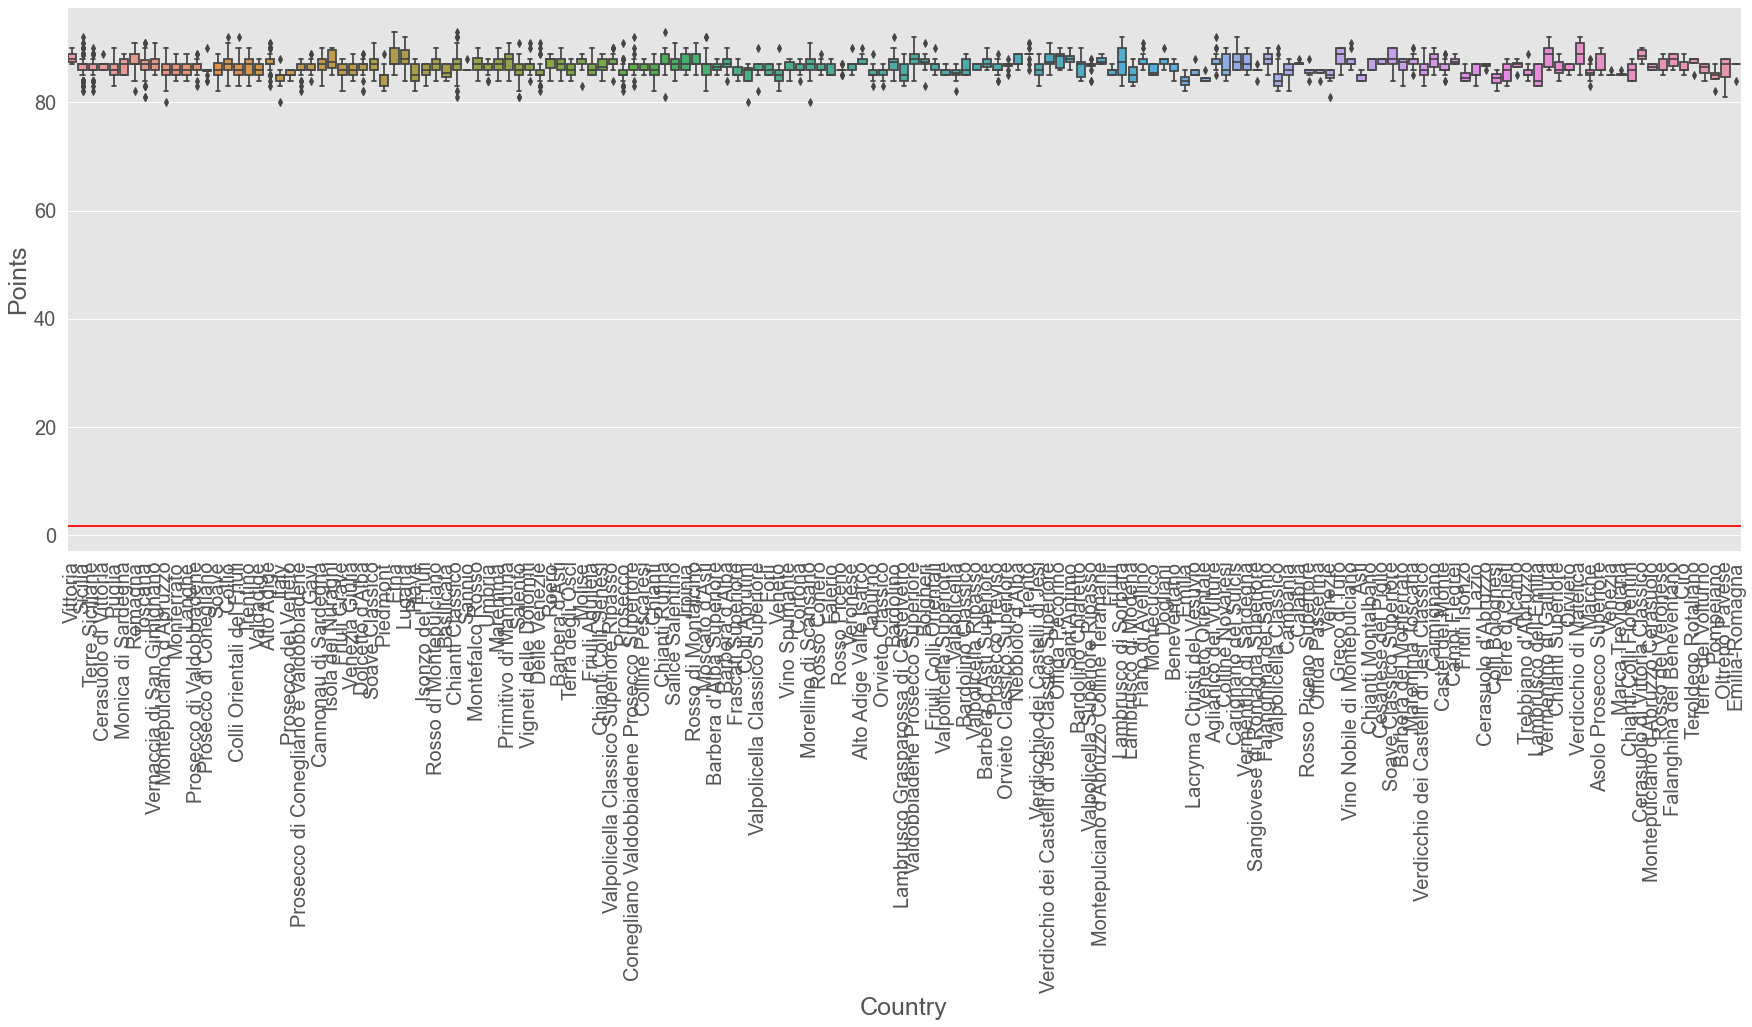

In [51]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='region_1', y='points', data=italy_data_new)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
#ax.set_title('Points per region', fontweight="bold", size=25) # Title
ax.axhline(y=average_rating, color='red')
ax.set_ylabel('Points', fontsize = 25) # Y label
ax.set_xlabel('Country',  fontsize = 25) # X label
plt.xticks(rotation=90)
plt.savefig('boxplot.svg', bbox_inches='tight')
plt.show()

In [55]:
italy_data_new.winery.nunique()

1451

In [56]:
italy_data_new.shape

(4690, 14)

In [57]:
italy_data_new.groupby('region_1')['points'].mean().sort_values(ascending=False)

region_1
Trento                            88.923077
Verdicchio di Matelica            88.777778
Cerasuolo di Vittoria Classico    88.666667
Vermentino di Gallura             88.571429
Lugana                            88.320000
                                    ...    
Piedmont                          84.592593
Italy                             84.529412
Veneto Orientale                  84.500000
Colli Bolognesi                   84.250000
Emilia                            84.000000
Name: points, Length: 161, dtype: float64

In [58]:
italy_data_new_top5_region_1 = italy_data_new.loc[(italy_data_new['region_1'] == 'Trento')
                                                 | (italy_data_new['region_1'] == 'Verdicchio di Matelica')
                                                 | (italy_data_new['region_1'] == 'Cerasuolo di Vittoria Classico')
                                                 | (italy_data_new['region_1'] == 'Vermentino di Gallura')
                                                 | (italy_data_new['region_1'] == 'Lugana')]

In [59]:
italy_data_new_top5_region_1.winery.nunique()

35

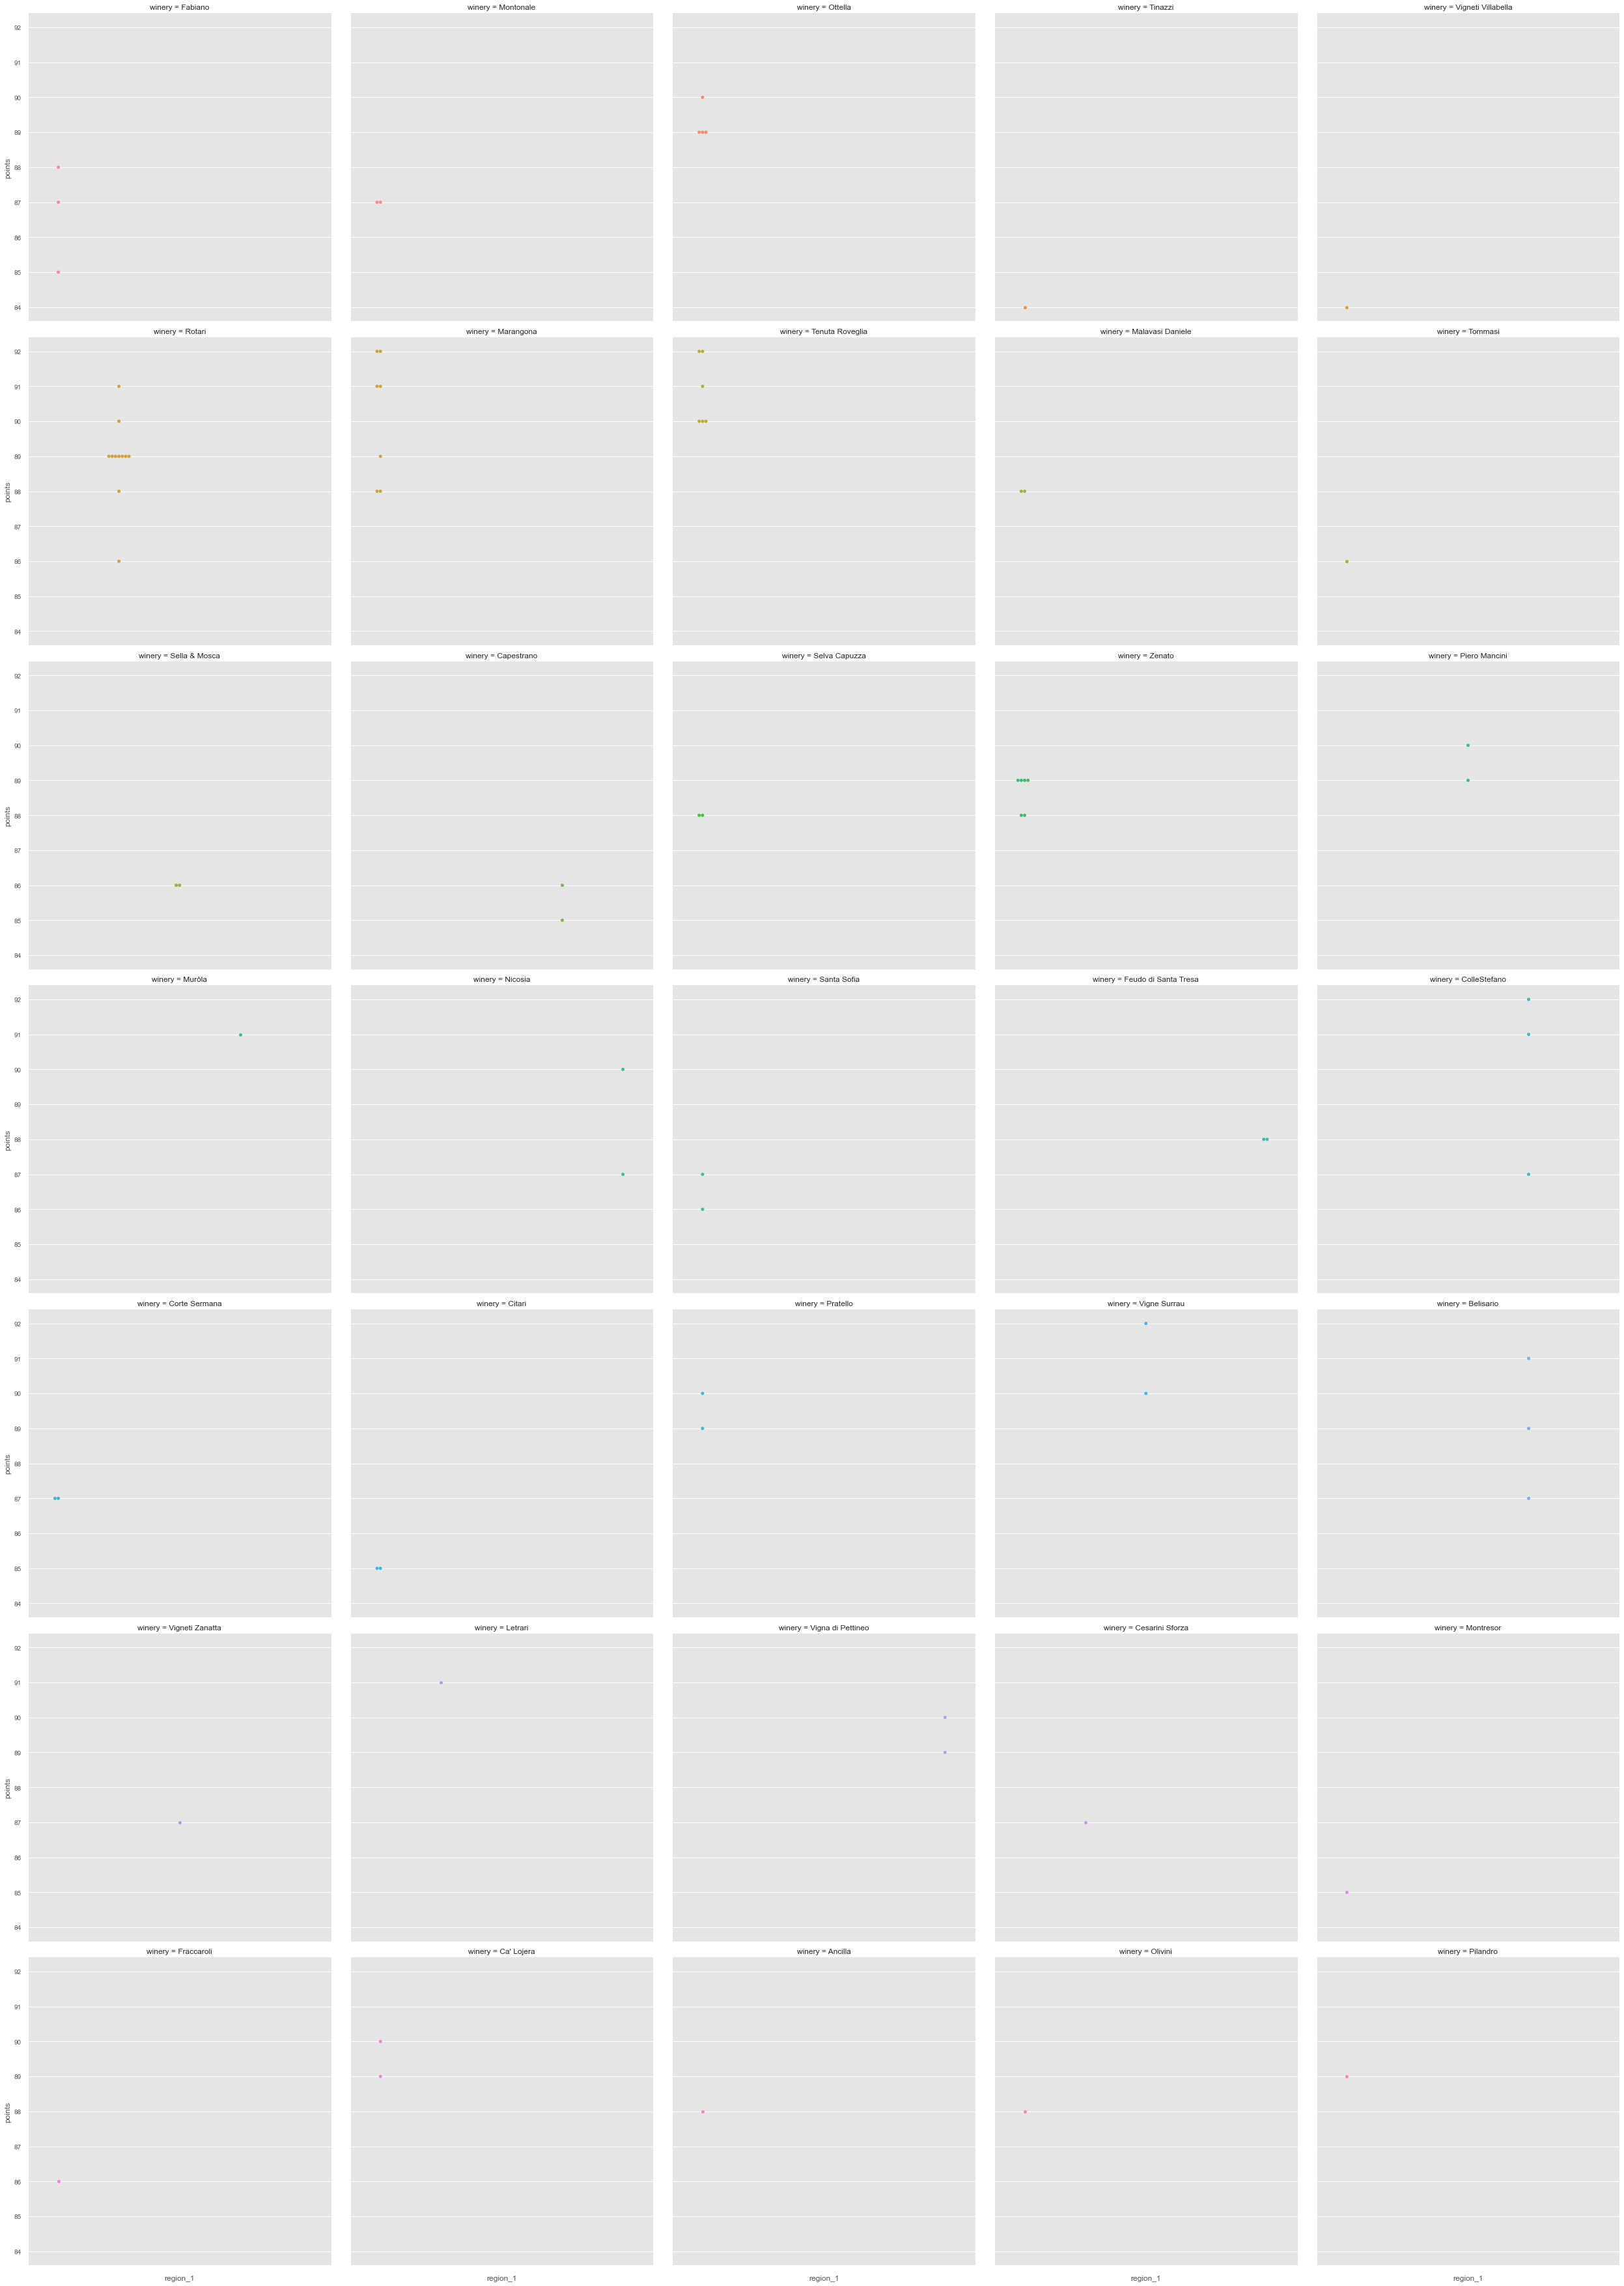

In [60]:

g = sns.factorplot(x='region_1', 
                   y='points',
                   col_wrap=5, height=7,
                   data=italy_data_new_top5_region_1, 
                   hue='winery',  # Color by stage
                   col='winery',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=90)
g.savefig("output.png")
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

In [61]:
wife = data.loc[(data['variety'] == 'Sauvignon Blanc') & (data['country'] == 'South Africa')]
wife.shape

(179, 14)

In [62]:
wife.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_length
694,South Africa,"This is a well-balanced, well-structured white...",Reserve,91,50.0,Stellenbosch,NaN,NaN,Lauren Buzzeo,@laurbuzz,Reyneke 2013 Reserve Sauvignon Blanc (Stellenb...,Sauvignon Blanc,Reyneke,392
1245,South Africa,"This delicate, elegant NLH wine starts with al...",Noble Late Harvest,88,35.0,Stellenbosch,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Mulderbosch 2006 Noble Late Harvest Sauvignon ...,Sauvignon Blanc,Mulderbosch,185


In [63]:
mother = data.loc[(data['variety'] == 'Chardonnay') & (data['country'] == 'Chile')]
mother.shape

(516, 14)

In [64]:
mother.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_length
103,Chile,A bright nose with green apple and citric arom...,Single Vineyard Falaris Hill,87,18.0,Leyda Valley,NaN,NaN,Michael Schachner,@wineschach,Leyda 2015 Single Vineyard Falaris Hill Chardo...,Chardonnay,Leyda,257
189,Chile,"Clean and honest up front, with moderate richn...",Natura,87,11.0,Casablanca Valley,NaN,NaN,Michael Schachner,@wineschach,Emiliana 2008 Natura Chardonnay (Casablanca Va...,Chardonnay,Emiliana,297


countryThe country that the wine is from
description
designationThe vineyard within the winery where the grapes that made the wine are from
pointsThe number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
priceThe cost for a bottle of the wine
provinceThe province or state that the wine is from
region_1- The wine growing area in a province or state (ie Napa)
region_2- Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
taster_name
taster_twitter_handle
title- The title of the wine review, which often contains the vintage if you're interested in extracting that feature
variety- The type of grapes used to make the wine (ie Pinot Noir)
winery- The winery that made the wine

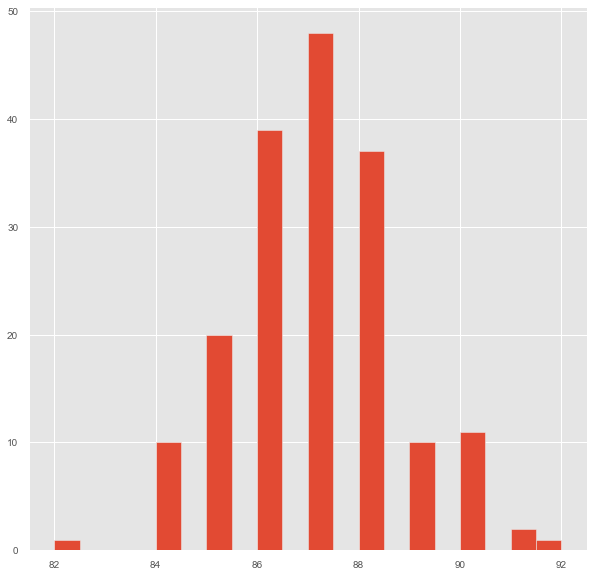

In [65]:
wife.points.hist(bins=20, figsize=(10,10))
plt.show()

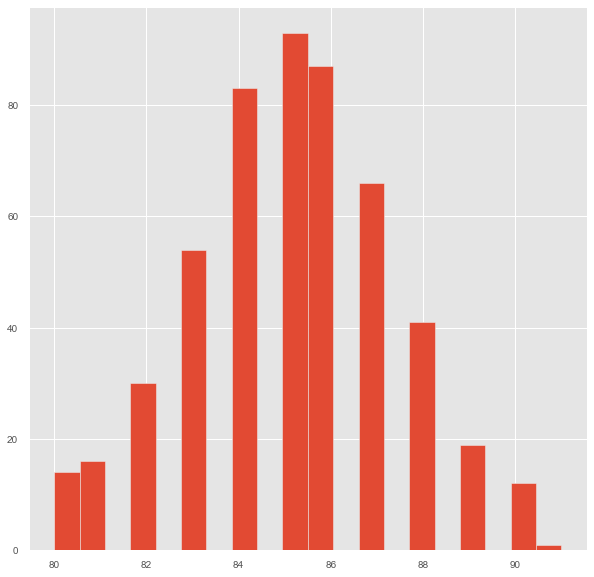

In [66]:
mother.points.hist(bins=20, figsize=(10,10))
plt.show()

In [67]:
wife_data = wife[['points','price', 'country']]
mother_data = mother[['points','price', 'country']]
final_data_analysis = pd.concat([wife_data, mother_data], axis=0)

In [68]:
final_data_analysis

,points,price,country
694,91,50.0,South Africa
1245,88,35.0,South Africa
1247,88,13.0,South Africa
3682,84,11.0,South Africa
3683,84,19.0,South Africa
...,...,...,...
128597,85,10.0,Chile
128617,85,11.0,Chile
128864,86,17.0,Chile
128880,85,10.0,Chile


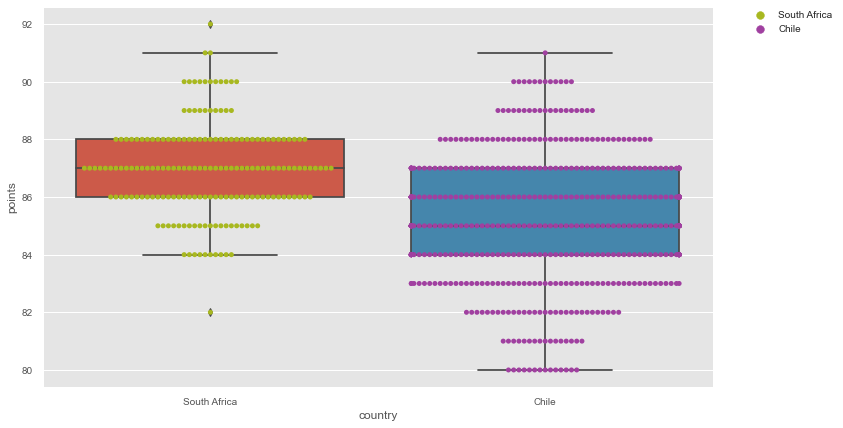

In [69]:
pkmn_type_colors = ['#A8B820',  # Bug
                    '#A040A0',  # Poison
                   ]

ax = sns.boxplot(x="country", y="points", data=final_data_analysis)
ax = sns.swarmplot(x="country", y="points", hue='country', data=final_data_analysis, palette=pkmn_type_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

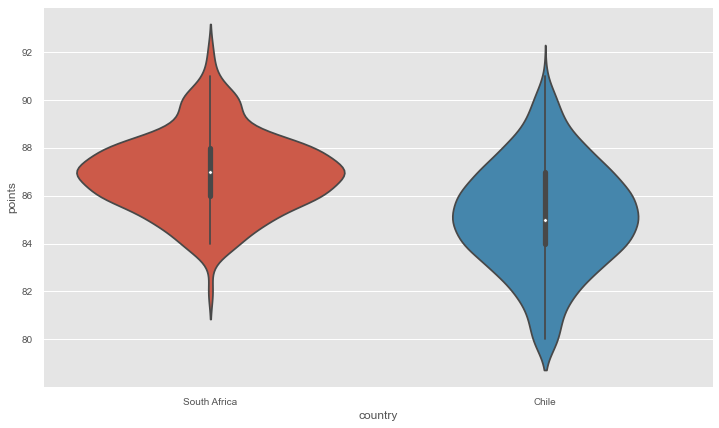

In [70]:

sns.violinplot(x='country', y='points', data=final_data_analysis,) 


In [71]:
final_data_analysis.groupby("country")['points'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Chile,516.0,85.133721,2.214591,80.0,84.0,85.0,87.0,91.0
South Africa,179.0,86.938547,1.618579,82.0,86.0,87.0,88.0,92.0


In [72]:
import researchpy as rp
rp.summary_cont(final_data_analysis.groupby("country")['points'])

,N,Mean,SD,SE,95% Conf.,Interval
country,,,,,,
Chile,516,85.133721,2.214591,0.097492,84.942451,85.324991
South Africa,179,86.938547,1.618579,0.120978,86.700765,87.176330


In [73]:
stats.levene(wife['points'], mother['points'])

LeveneResult(statistic=22.057902557116837, pvalue=3.1903880424117288e-06)

In [74]:
stats.ttest_ind(wife['points'], mother['points'])

Ttest_indResult(statistic=10.013207113906546, pvalue=3.9092416828531867e-22)

In [75]:
descriptives, results = rp.ttest(wife['points'], mother['points'])

In [76]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,points,179.0,86.938547,1.618579,0.120978,86.699811,87.177284
1,points,516.0,85.133721,2.214591,0.097492,84.942190,85.325252
2,combined,695.0,85.598561,2.221521,0.084267,85.433112,85.764010


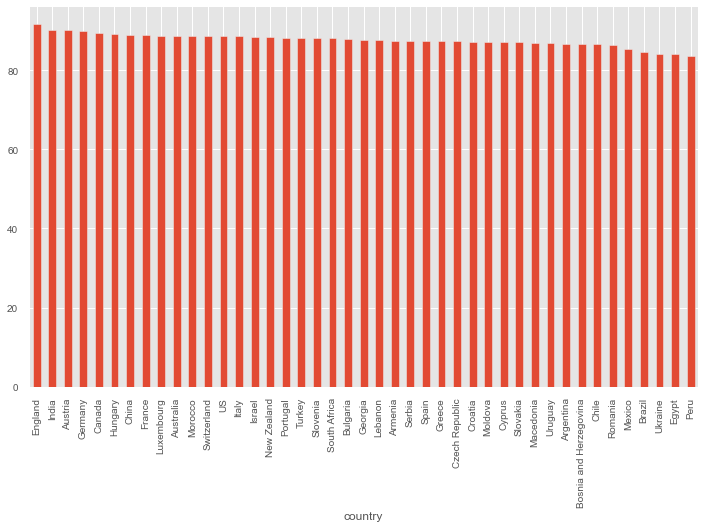

In [77]:
data.groupby("country")['points'].mean().sort_values(ascending=False).plot.bar()

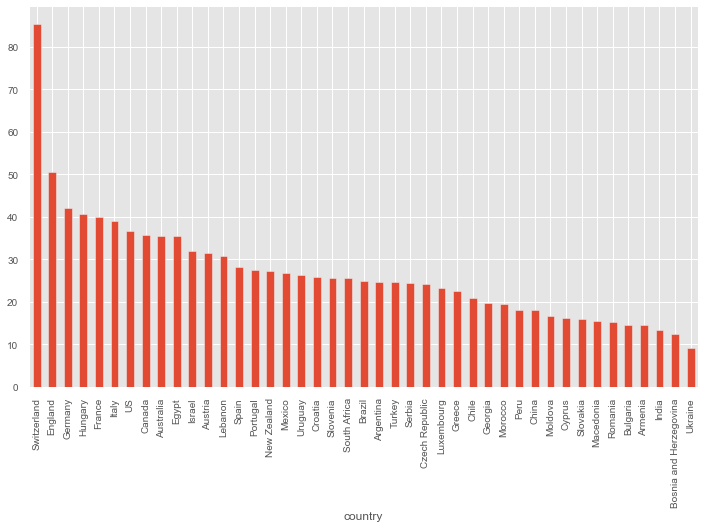

In [78]:
data.groupby("country")['price'].mean().sort_values(ascending=False).plot.bar()

In [79]:
data.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

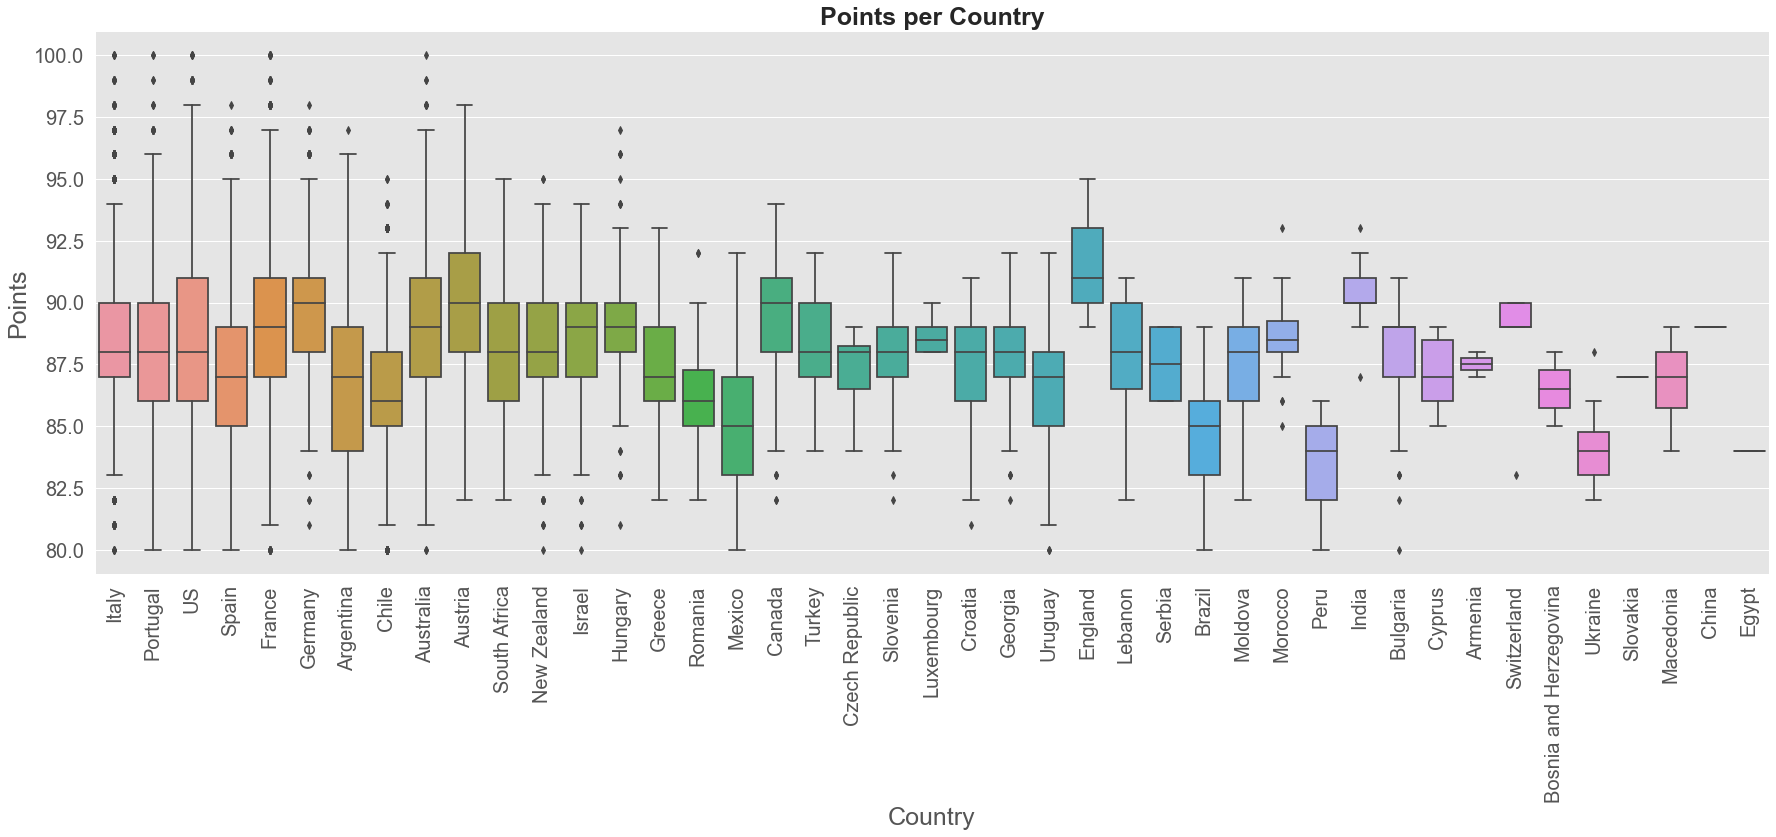

In [80]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='country', y='points', data=data)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Points per Country', fontweight="bold", size=25) # Title
ax.set_ylabel('Points', fontsize = 25) # Y label
ax.set_xlabel('Country',  fontsize = 25) # X label
plt.xticks(rotation=90)
plt.show()

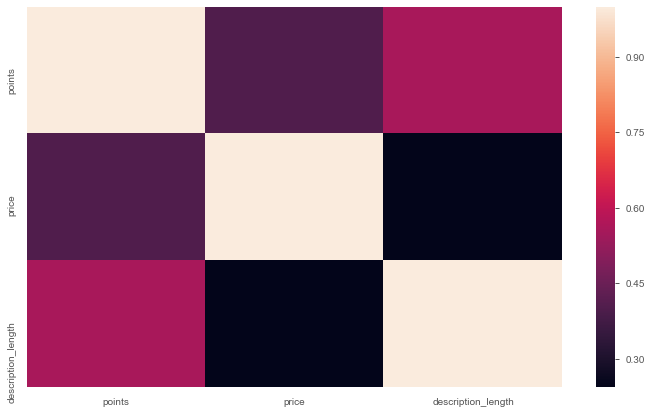

In [81]:
corr = data.corr()
 
# Heatmap
sns.heatmap(corr)

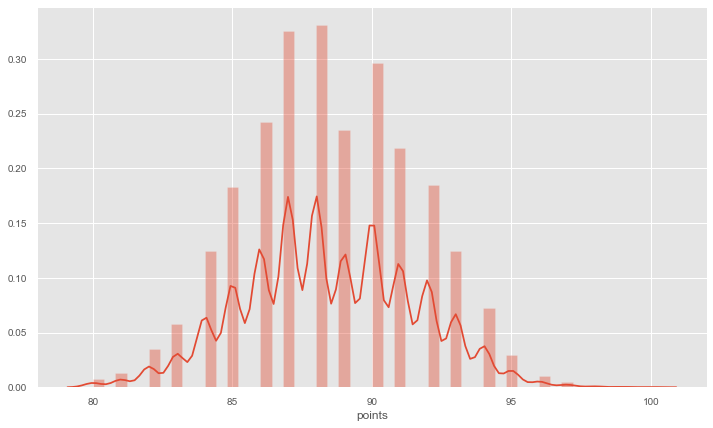

In [82]:
sns.distplot(data.points)


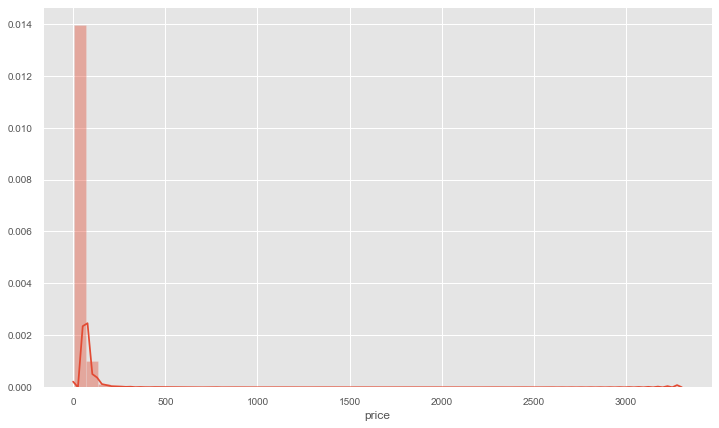

In [83]:
sns.distplot(data.price)

In [84]:
south_blanc = data.loc[(data['variety'] == 'Sauvignon Blanc')
                                                 & (data['country'] == 'South Africa')
                                                 & (data['price'] == 15)]

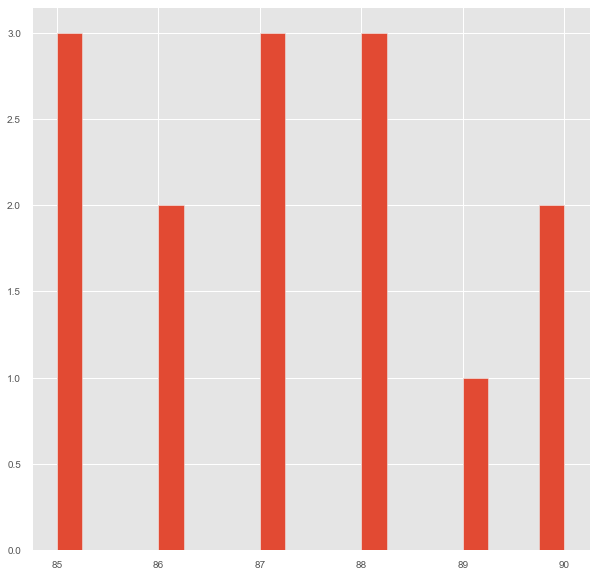

In [85]:
south_blanc.shape
south_blanc.points.hist(bins=20, figsize=(10,10))
plt.show()

In [86]:
chile_chard = data.loc[(data['variety'] == 'Chardonnay')
                                                 & (data['country'] == 'Chile')
                                                 & (data['price'] == 15)]

(37, 14)

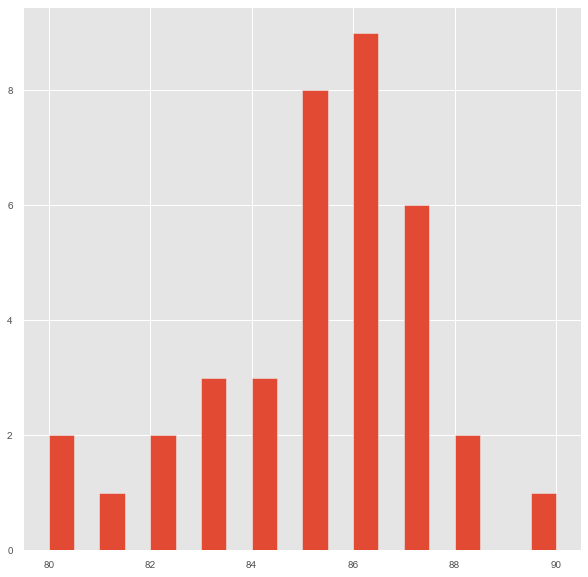

In [87]:
chile_chard.points.hist(bins=20, figsize=(10,10))
chile_chard.shape

In [88]:
wife_data_2 = south_blanc[['points','price', 'country']]
mother_data_2 = chile_chard[['points','price', 'country']]
final_data_analysis_2 = pd.concat([wife_data_2, mother_data_2], axis=0)

In [89]:
print(final_data_analysis_2.shape)

final_data_analysis_2.country.replace('South Africa', 'South Africa: Sauvignon Blanc', inplace=True)
final_data_analysis_2.country.replace('Chile', 'Chile: Chardonnay', inplace=True)
final_data_analysis_2['Wine'] = final_data_analysis_2.country

(51, 3)




g-   2.9505494505494503
f-   4.854354354354356


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,South Africa: Sauvignon Blanc,14.0,87.214286,1.717716,0.459079,86.222506,88.206066
1,Chile: Chardonnay,37.0,85.081081,2.203260,0.362214,84.346478,85.815685
2,combined,51.0,85.666667,2.277425,0.318903,85.026130,86.307203


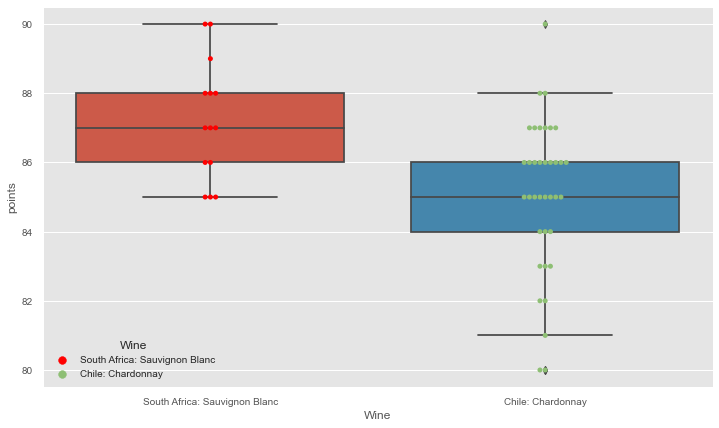

In [90]:
pkmn_type_colors = ['red',  # Bug
                    '#8ebf74',  # Poison
                   ]
a = ax.scatter([1,2],[3,4], marker='s')
b = ax.scatter([1,2],[3,4], marker='^')

ax = sns.boxplot(x="Wine", y="points", data=final_data_analysis_2)
ax = sns.swarmplot(x="Wine", y="points", hue='Wine', data=final_data_analysis_2, ax=ax, palette=pkmn_type_colors)
plt.savefig('test4.emp.svg', bbox_inches='tight')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

import researchpy as rp
rp.summary_cont(final_data_analysis_2.groupby("Wine")['points'])

wife_data_2.rename(columns={'points':'South Africa: Sauvignon Blanc'}, 
                 inplace=True)

mother_data_2.rename(columns={'points':'Chile: Chardonnay'}, 
                 inplace=True)

descriptives, results = rp.ttest(wife_data_2['South Africa: Sauvignon Blanc'], mother_data_2['Chile: Chardonnay'],)
print('g-  ',wife_data_2['South Africa: Sauvignon Blanc'].var())
print('f-  ',mother_data_2['Chile: Chardonnay'].var())
descriptives


In [91]:
results

,Independent t-test,results
0,Difference (South Africa: Sauvignon Blanc - Ch...,2.1332
1,Degrees of freedom =,49.0000
2,t =,3.2599
3,Two side test p value =,0.0020
4,Difference < 0 p value =,0.9990
5,Difference > 0 p value =,0.0010
6,Cohen's d =,1.0229
7,Hedge's g =,1.0071
8,Glass's delta =,1.2419
9,r =,0.4222


In [92]:
south_blac_point = np.random.choice(south_blanc.points)

In [93]:
south_blac_point

88

yes = 0
for i in range(500000):
    if np.random.choice(south_blanc.points) > np.random.choice(chile_chard.points):
        yes +=1
print("prob that it would be better than chard is ", yes/500000)

In [94]:
data.variety.nunique()

707

In [95]:
data.variety.value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Parraleta                       1
Pinot Blanc-Pinot Noir          1
Paralleda                       1
Loureiro-Arinto                 1
Früburgunder                    1
Name: variety, Length: 707, dtype: int64

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='variety', y='points', data=data)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Points per region', fontweight="bold", size=25) # Title
ax.axhline(y=average_rating, color='red')
ax.set_ylabel('Points', fontsize = 25) # Y label
ax.set_xlabel('Country',  fontsize = 25) # X label
plt.xticks(rotation=90)
plt.show()

In [96]:
data.groupby('variety')['points'].mean().sort_values(ascending=False)

variety
Terrantez              95.000000
Tinta del Pais         95.000000
Gelber Traminer        95.000000
Bual                   94.142857
Riesling-Chardonnay    94.000000
                         ...    
Picapoll               82.000000
Aidani                 82.000000
Shiraz-Tempranillo     82.000000
Airen                  81.666667
Chancellor             80.500000
Name: points, Length: 707, dtype: float64

((array([-2.21154155, -1.84175131, -1.62365924, -1.46329903, -1.33363779,
         -1.22318558, -1.1259265 , -1.03829303, -0.95798431, -0.88342315,
         -0.81347686, -0.74730127, -0.68424773, -0.62380483, -0.5655602 ,
         -0.50917466, -0.45436405, -0.40088629, -0.34853176, -0.29711609,
         -0.24647455, -0.19645772, -0.14692788, -0.09775611, -0.0488197 ,
          0.        ,  0.0488197 ,  0.09775611,  0.14692788,  0.19645772,
          0.24647455,  0.29711609,  0.34853176,  0.40088629,  0.45436405,
          0.50917466,  0.5655602 ,  0.62380483,  0.68424773,  0.74730127,
          0.81347686,  0.88342315,  0.95798431,  1.03829303,  1.1259265 ,
          1.22318558,  1.33363779,  1.46329903,  1.62365924,  1.84175131,
          2.21154155]),
  array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, 

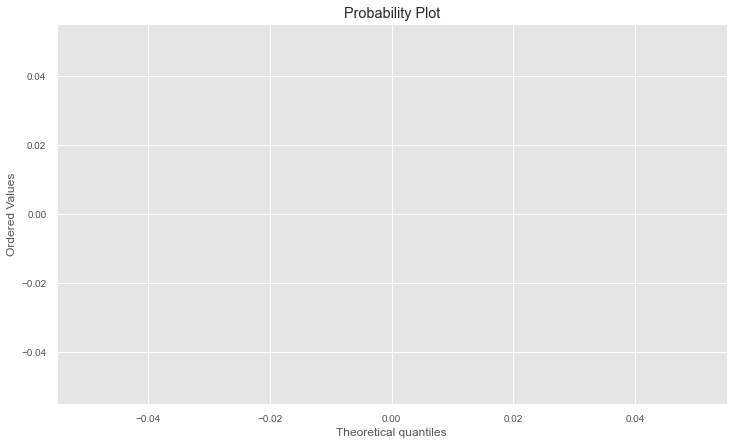

In [97]:
import pandas as pd

# Two different methods of conducting a t-test
import researchpy as rp
from scipy import stats
stats.probplot(south_blanc.points - chile_chard.points, plot= plt)

In [98]:
stats.ttest_ind(south_blanc['points'], chile_chard['points'])

Ttest_indResult(statistic=3.2599013824410625, pvalue=0.0020301740665540973)

In [99]:
descriptives, results = rp.ttest(south_blanc['points'], chile_chard['points'])

In [102]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,points,14.0,87.214286,1.717716,0.459079,86.222506,88.206066
1,points,37.0,85.081081,2.203260,0.362214,84.346478,85.815685
2,combined,51.0,85.666667,2.277425,0.318903,85.026130,86.307203


In [103]:
south_blanc.points.mean()

87.21428571428571

In [104]:
south_blanc.points.std()

1.7177163475234933

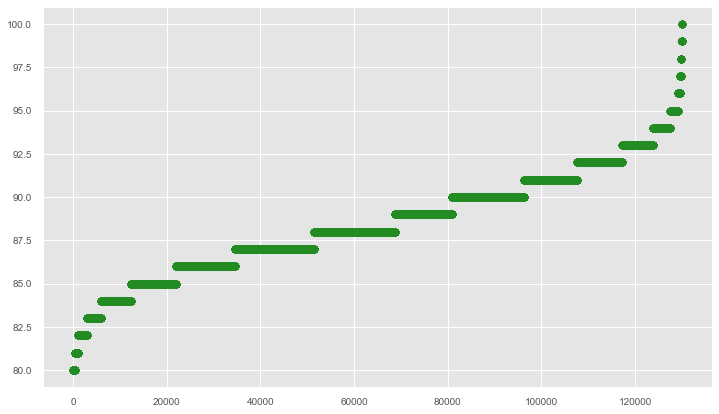

In [105]:
plt.scatter(range(data.shape[0]), np.sort(data.points.values), color='forestgreen') # creating a cumulative distribution
#plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
#plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
#plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.show() #rendering the graphs

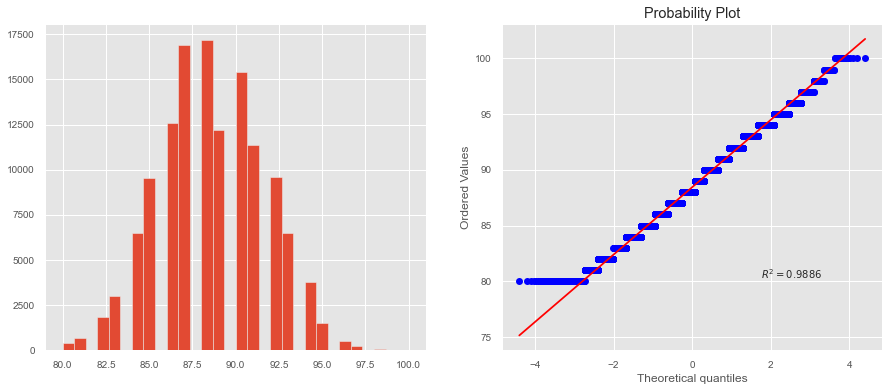

In [106]:

def util_plot(dataset, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.plot(markerfacecolor='red')
    dataset[variable].hist(bins=30)
    plt.plot(markerfacecolor='red')
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], fit=True, rvalue=True, dist="norm", plot=plt)

    plt.show()

util_plot(data, 'points')

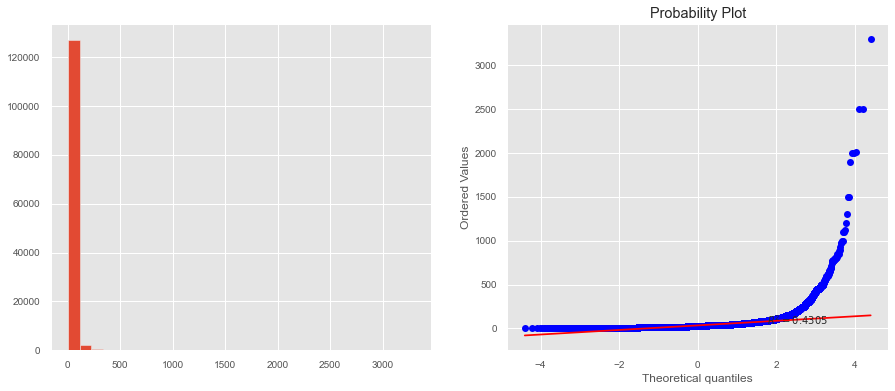

In [107]:
def util_plot(dataset, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.plot(markerfacecolor='red')
    dataset[variable].hist(bins=30)
    plt.plot(markerfacecolor='red')
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], fit=True, rvalue=True, dist="norm", plot=plt)

    plt.show()

util_plot(data, 'price')

In [108]:
Q3 = np.quantile(data['points'], 0.75) #Third quartile
Q1 = np.quantile(data['points'], 0.25) #First quartile
IQR = Q3 - Q1 #Inter Quartile Range

outlier_score_threshold =  Q3 + 1.5 * IQR
outlier_score_threshold_1 =  Q1 - 1.5 * IQR

outlier_number=len(data[ data['points'] > outlier_score_threshold ])

print("Number of outliers:", outlier_number,
      "\nOutlier proportion:", round(outlier_number/len(data['points'])*100, 3),"%",
      "\nOutlier threshold score:", outlier_score_threshold,"/ 100")



outlier_number_right=len(data[ data['points'] < outlier_score_threshold_1 ])
print(outlier_number_right)

Number of outliers: 52 
Outlier proportion: 0.04 % 
Outlier threshold score: 98.5 / 100
0


style.use('ggplot')
stats.probplot(data['points'], fit=True, rvalue=True, dist="norm", plot=plt)
plt.title("Probability Plot to Compare Points Distribution to Perfectly Normal Distribution")

plt.savefig('test3.svg', bbox_inches='tight')
plt.show()

kde = stats.gaussian_kde(normal_distr_values)
pos = np.linspace(min(normal_distr_values), max(normal_distr_values), 50000)
plt.plot(pos, kde(pos), color='purple')
shade = np.linspace(minus_one_std_dev, plus_one_std_dev, 300)
plt.fill_between(shade, kde(shade), alpha=0.5, color='purple',)
plt.text(x=0.25, y=.0085, horizontalalignment='center', fontsize=16, 
         s="68% of values fall within\n this shaded area of\n plus or minus 1 standard\n deviation from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.25"))
plt.title("KDE Plot of Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("probability", labelpad=15);

In [109]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
td {
  font-size: 15px;
}
.rendered_html th{border: 1px solid black;
  font-size: 15px;}
.rendered_html td{border: 1px solid black;
  font-size: 15px;}
</style>

In [110]:
%%HTML
<style>
div.warn {
    font-family: "Roboto";
    border-color: #dFb5b4;
    color: #313131;
    border-left: 2px solid #6d7373;
    border-right: 2px solid #6d7373;
    border-bottom: 2px solid #6d7373;
    border-top: 2px solid #6d7373;
    padding: 20px;		
    font-size: 20px;
    }

div.ref {
    font-family: "Roboto";
    border-color: #dFb5b4;
    color: #313131;
    border-left: 1px solid #6d7373;
    padding: 10px;		
    font-size: 18px;
    }

#toc_container {
    font-family: "Roboto";
    font-size: 20px;
    margin-bottom: 0.5em;
    padding: 20px;
    width: auto;
}

.toc_title {
    font-size: 22px;
    font-weight: 700;
    text-align: center;
}

#toc_container li, #toc_container ul, #toc_container ul li{
    color: #6d7373;
    list-style: outside none none !important;
}
.rendered_html :link {
    text-decoration: none;
}
a{text-decoration:none;
color: #6d7373;}
a:hover {
  color: #313131;
}
</style>

In [111]:
X = data.loc[(data['points'] > 86) & (data['points'] < 91)]

In [112]:
X.shape

(61776, 14)

In [113]:
data.shape

(129971, 14)

In [114]:
og_data.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
description_length           0
dtype: int64

In [115]:
cols = list(og_data.columns.values)
cols

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery',
 'description_length']

In [116]:
og_data = og_data[['country',
 'description',
 'designation',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery',
 'description_length',
                   'points',]]


# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
# load data
og_data
array = og_data.values
X = array[:,0:13]
Y = array[:,13]
# feature extraction
fs = SelectKBest(score_func=chi2, k='all')
fit = fs.fit(X, Y)
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])


sel_chi2 = SelectKBest(chi2, k=4)    # select 4 features
X_train_chi2 = sel_chi2.fit_transform(X, Y)
print(sel_chi2.get_support())

In [117]:
og_data.country.nunique()

43

In [118]:
og_data1=og_data.drop(columns=['description_length'])
total = og_data1.isnull().sum().sort_values(ascending = False)
percent = (og_data1.isnull().sum()/og_data1.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total Missing Records', 'Total Missing Records (%)'])
missing_data.reset_index()

,index,Total Missing Records,Total Missing Records (%)
0,region_2,79460,61.136715
1,designation,37465,28.825661
2,taster_twitter_handle,31213,24.015357
3,taster_name,26244,20.192197
4,region_1,21247,16.347493
5,price,8996,6.921544
6,province,63,0.048472
7,country,63,0.048472
8,variety,1,0.000769
9,points,0,0.000000


In [119]:
og_data.columns.values

array(['country', 'description', 'designation', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle',
       'title', 'variety', 'winery', 'description_length', 'points'],
      dtype=object)

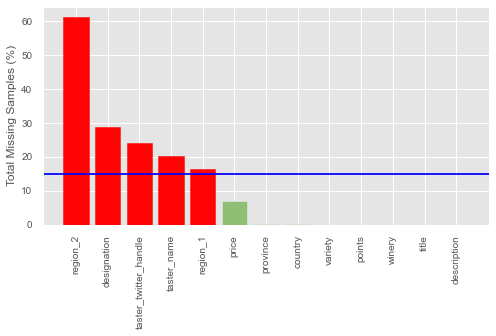

In [120]:
fig, ax = plt.subplots(figsize=(8, 4))
#plt.xticks(dataset.index, dataset[variable], rotation=90)

b = ax.bar(missing_data.index, missing_data["Total Missing Records (%)"], color='#8ebf74')
b[0].set_color('#ff0404')
b[1].set_color('#ff0404')
b[2].set_color('#ff0404')
b[3].set_color('#ff0404')
b[4].set_color('#ff0404')

#ax2.plot(dataset.index, dataset["points"], color='cornflowerblue')
ax.axhline(y=15, color='blue')
ax.set_ylabel('Total Missing Samples (%)')
#ax.set_xlabel(missing_data.index)
#ax2.set_ylabel('Columns')
plt.xticks(rotation=90)
plt.savefig('test1re.svg', bbox_inches='tight')
plt.show()

In [121]:
og_data1=og_data.drop(columns=['points', 'price', 'description_length'])
percent = (og_data1.nunique()/len(og_data1)*100).sort_values(ascending = False)
total = og_data1.nunique().sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total Unique Values', 'Cardinality (%)'])
missing_data.reset_index()

,index,Total Unique Values,Cardinality (%)
0,description,119955,92.293666
1,title,118840,91.435782
2,designation,37979,29.221134
3,winery,16757,12.892876
4,region_1,1229,0.945596
5,variety,707,0.543968
6,province,425,0.326996
7,country,43,0.033084
8,taster_name,19,0.014619
9,region_2,17,0.013080


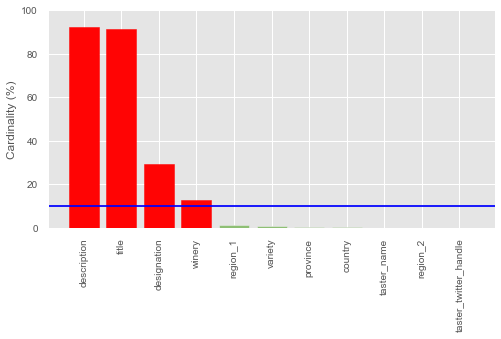

In [122]:
fig, ax = plt.subplots(figsize=(8, 4))
#plt.xticks(dataset.index, dataset[variable], rotation=90)

b = ax.bar(missing_data.index, missing_data["Cardinality (%)"], color='#8ebf74')
b[0].set_color('#ff0404')
b[1].set_color('#ff0404')
b[2].set_color('#ff0404')
b[3].set_color('#ff0404')

#ax2.plot(dataset.index, dataset["points"], color='cornflowerblue')
ax.axhline(y=10, color='blue')
ax.set_ylabel('Cardinality (%)')
#ax.set_xlabel(missing_data.index)
#ax2.set_ylabel('Columns')
plt.ylim(0, 100)
plt.xticks(rotation=90)
plt.savefig('test1r2e.svg', bbox_inches='tight')
plt.show()

In [123]:
og_data.winery.value_counts().head(10)

Wines & Winemakers       222
Testarossa               218
DFJ Vinhos               215
Williams Selyem          211
Louis Latour             199
Georges Duboeuf          196
Chateau Ste. Michelle    194
Concha y Toro            164
Columbia Crest           159
Kendall-Jackson          130
Name: winery, dtype: int64

In [124]:
og_data.taster_twitter_handle.nunique()

15

import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()

# Import the cars dataset into H2O:
cars = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/junit/cars_20mpg.csv")

# Set the predictors and response;
# set the response as a factor:
cars["economy_20mpg"] = cars["economy_20mpg"].asfactor()
predictors = ["displacement","power","weight","acceleration","year"]
response = "economy_20mpg"

# Split the dataset into a train and valid set:
train, valid = cars.split_frame(ratios=[.8], seed=1234)

# Build and train the model:
cars_drf = H2ORandomForestEstimator(ntrees=10,
                                    max_depth=5,
                                    min_rows=10,
                                    calibrate_model=True,
                                    calibration_frame=valid,
                                    binomial_double_trees=True)
cars_drf.train(x=predictors,
               y=response,
               training_frame=train,
               validation_frame=valid)

perf = cars_drf.model_performance()

# Generate predictions on a validation set (if necessary):
pred = cars_drf.predict(valid)

cars_drf.varimp(use_pandas=True)

import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()
og_data = h2o.import_file("./winemag-data-130k-v2.csv")

cars["economy_20mpg"] = cars["economy_20mpg"].asfactor()
predictors = ['country',
 'description',
 'designation',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery',]
response = "economy_20mpg"

# Split the dataset into a train and valid set:
train, valid = og_data.split_frame(ratios=[.8], seed=1234)

# Build and train the model:
cars_drf = H2ORandomForestEstimator(ntrees=10,
                                    max_depth=5,
                                    min_rows=10,
                                    calibrate_model=True,
                                    calibration_frame=valid,
                                    binomial_double_trees=True)
cars_drf.train(x=predictors,
               y='points',
               training_frame=train,
               validation_frame=valid)

perf = cars_drf.model_performance()

# Generate predictions on a validation set (if necessary):
pred = cars_drf.predict(valid)

In [128]:
og_data.isnull().sum()

country                     63
description                  0
designation              37465
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
description_length           0
points                       0
dtype: int64

In [129]:
og_data = og_data.assign(title_length = data['title'].apply(len))

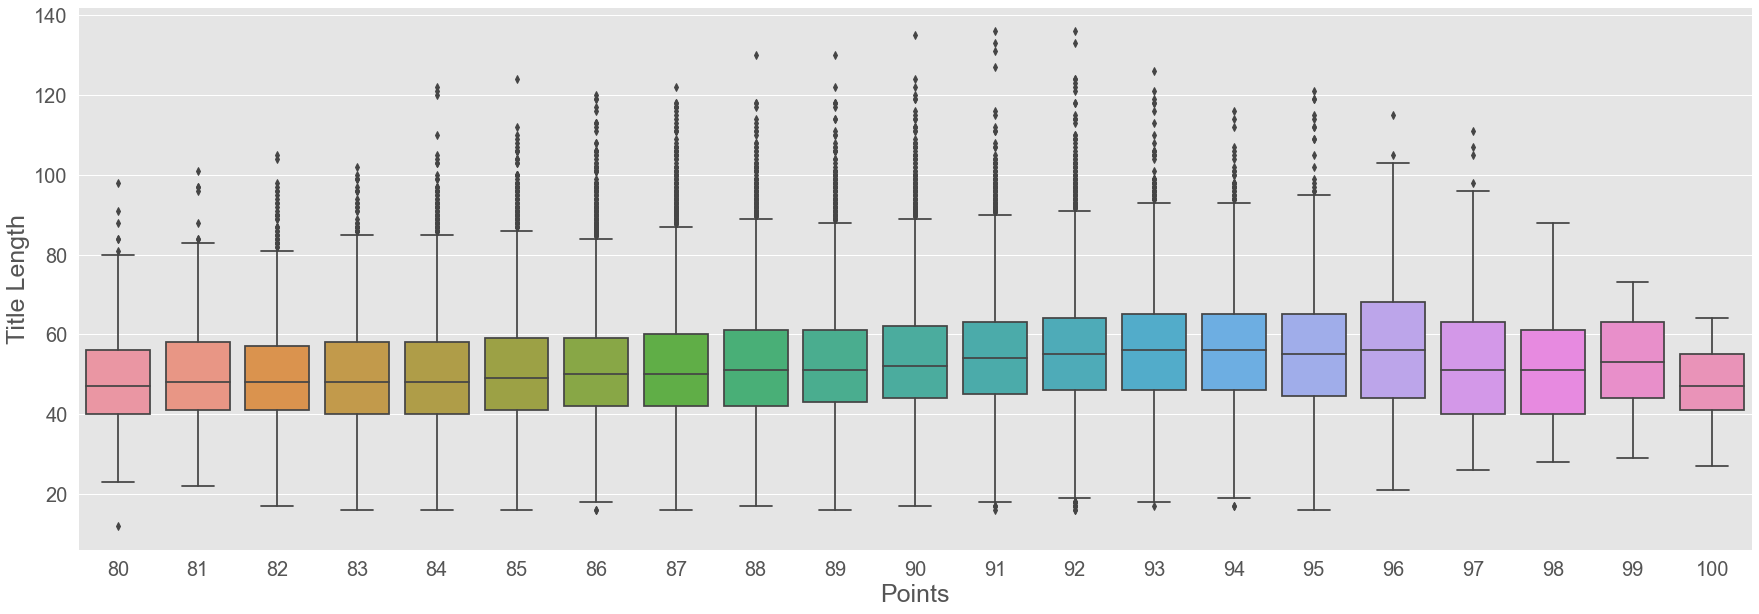

In [130]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='title_length', data=og_data)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
#ax.set_title('Description Length per Points', fontweight="bold", size=25) # Title
ax.set_ylabel('Title Length', fontsize = 25) # Y label
ax.set_xlabel('Points', fontsize = 25) # X label
plt.savefig('test2fwe.svg', bbox_inches='tight')
plt.show()

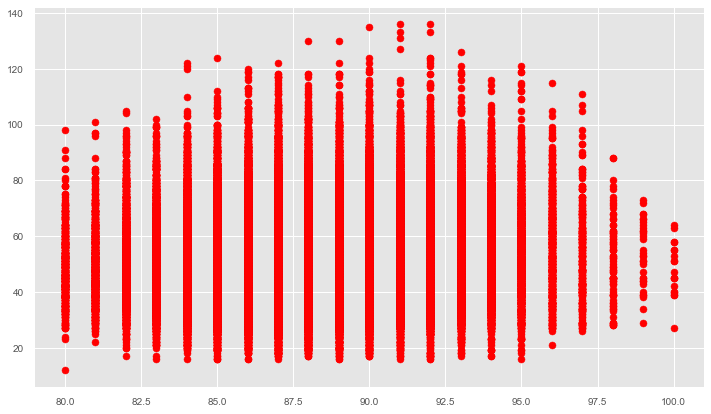

In [131]:
plt.scatter(og_data['points'], og_data["title_length"], color= 'red')

In [132]:
import scipy.stats
r, p = scipy.stats.pearsonr(og_data['points'], og_data['description_length'])
r

0.5577602558815873

In [133]:
import scipy.stats
r, p = scipy.stats.pearsonr(og_data['points'], og_data['description_length'])
r

0.5577602558815873

In [134]:
og_data['points'].corr(og_data['description_length'])

0.5577602558815876

In [135]:
og_data['description_length'].corr(og_data['points'])

0.5577602558815876

In [136]:
 result = scipy.stats.linregress(og_data['points'], og_data['description_length'])

In [137]:
result.rvalue

0.5577602558815876

In [138]:
result.pvalue

0.0

In [139]:
import scipy.stats
r, p = scipy.stats.pearsonr(og_data['points'], og_data['title_length'])
r

0.1356459650401716

In [142]:
import scipy.stats
r, p = scipy.stats.kendalltau(og_data['points'], og_data['description_length'])

In [143]:
import scipy.stats
r, p = scipy.stats.spearmanr(og_data['points'], og_data['description_length'])

posx and posy should be finite values
posx and posy should be finite values


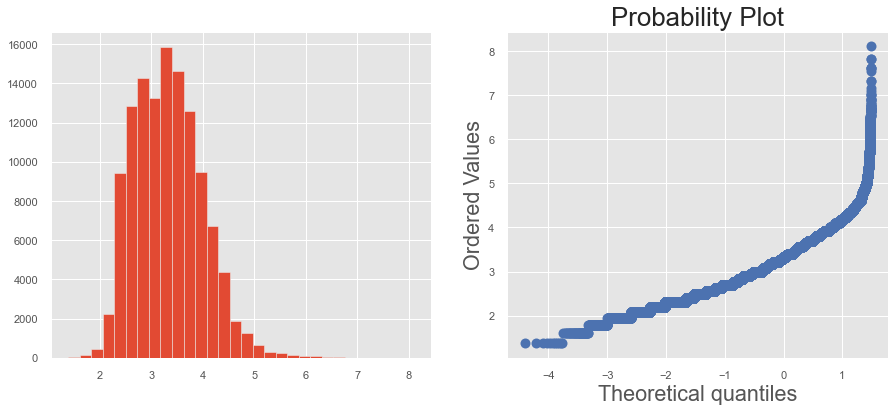

In [185]:
og_data['price'] = np.log(og_data['price'])
util_plot(og_data, 'price')

In [149]:
data_75_1 = pd.read_csv('75.ddcsv')
data_75_1.region_name.unique()

array(['Aglianico del Vulture', 'Alcamo', 'Alto Adige',
       'Alto Adige Valle Isarco', 'Asolo Prosecco Superiore',
       "Barbera d'Alba", "Barbera d'Asti", "Barbera d'Asti Superiore",
       'Bardolino', 'Bardolino Classico', 'Bolgheri', 'Calabria',
       'Campi Flegrei', 'Cannonau di Sardegna', 'Carignano del Sulcis',
       'Carmignano', "Cerasuolo d'Abruzzo", 'Cerasuolo di Vittoria',
       'Cerasuolo di Vittoria Classico', 'Cesanese del Piglio',
       'Chianti Classico', 'Chianti Montalbano', 'Chianti Rufina', 'Cirò',
       'Colline Novaresi', 'Collio',
       'Conegliano Valdobbiadene Prosecco Superiore', 'Dogliani', 'Etna',
       'Falanghina del Beneventano', 'Falanghina del Sannio',
       'Fiano di Avellino', 'Friuli Colli Orientali', 'Greco di Tufo',
       'Irpinia', 'Isola dei Nuraghi', 'Lambrusco di Sorbara', 'Lugana',
       'Maremma', 'Maremma Toscana', 'Molise', 'Monica di Sardegna',
       'Montefalco Rosso', "Montepulciano d'Abruzzo Colline Teramane",
       '

In [150]:
italy_data_x = italy_data.loc[italy_data['region_1'].isin(data_75_1.region_name.unique())]

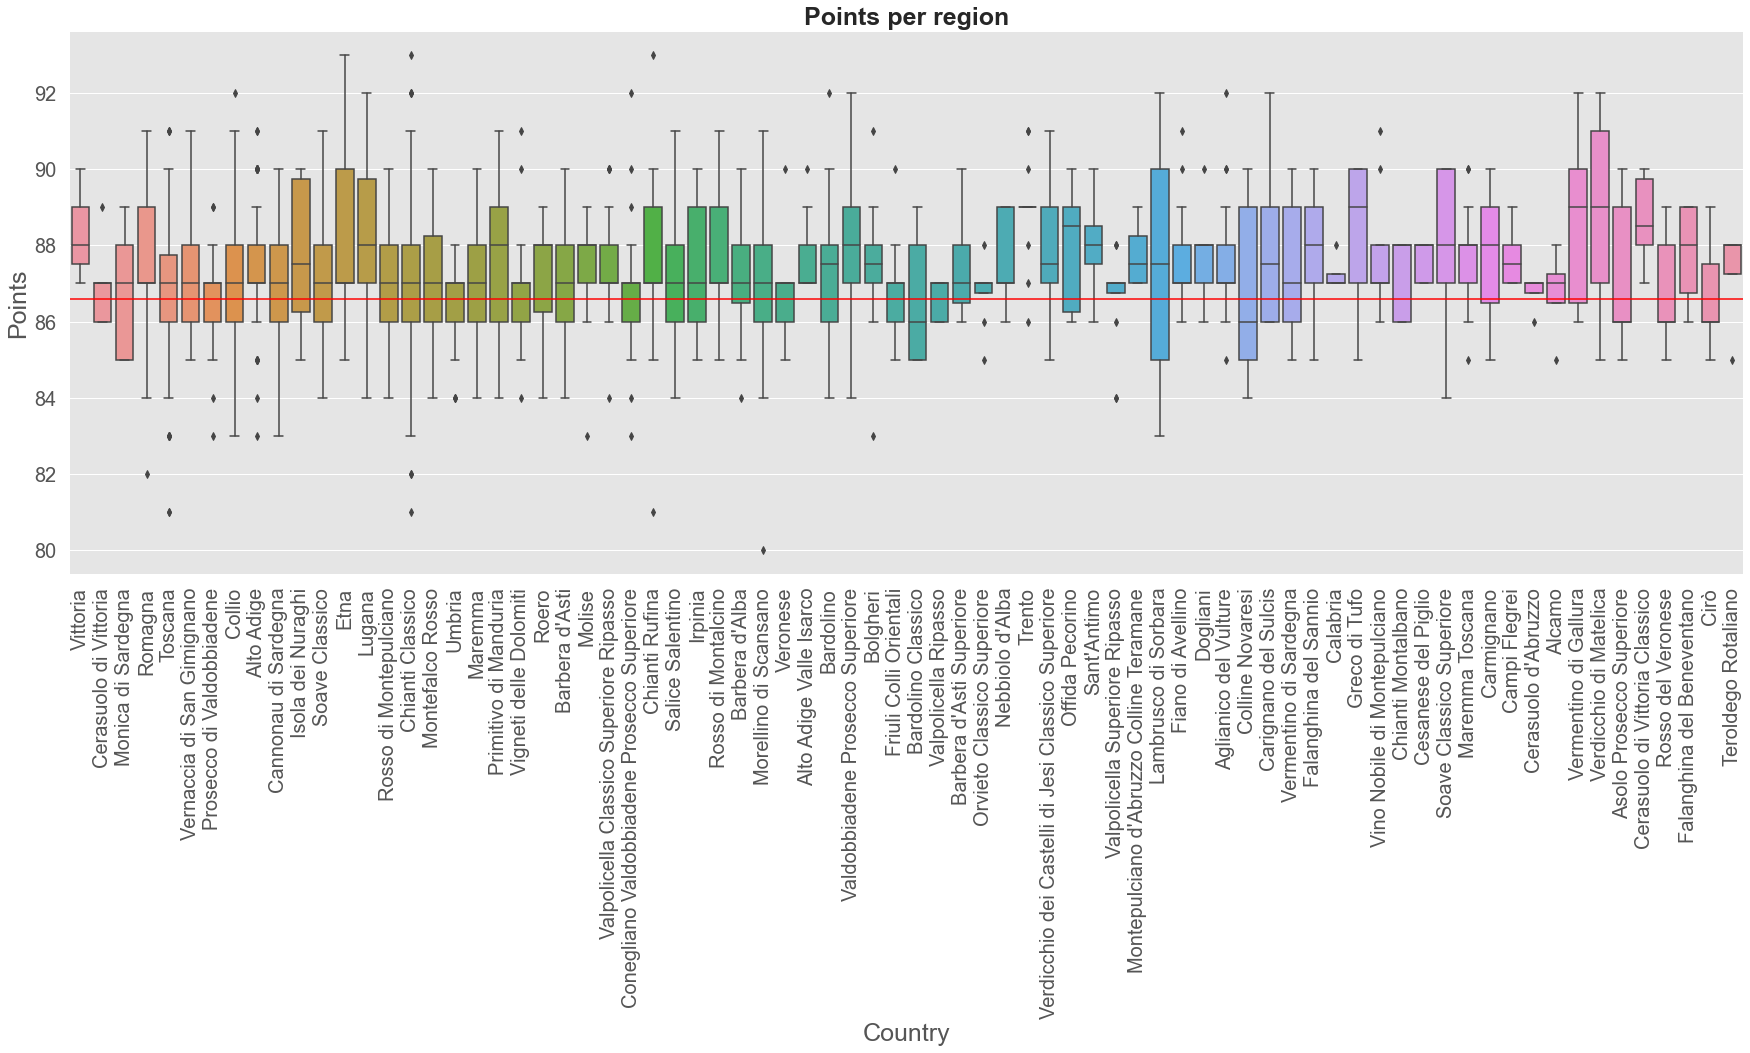

In [155]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='region_1', y='points', data=italy_data_x)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Points per region', fontweight="bold", size=25) # Title
ax.axhline(y=average_rating, color='red')
ax.set_ylabel('Points', fontsize = 25) # Y label
ax.set_xlabel('Country',  fontsize = 25) # X label
plt.xticks(rotation=90)
plt.savefig('boxplot11.svg', bbox_inches='tight')
plt.show()

In [139]:
data_75_1.region_name.unique()

array(['Aglianico del Vulture', 'Alcamo', 'Alto Adige',
       'Alto Adige Valle Isarco', 'Asolo Prosecco Superiore',
       "Barbera d'Alba", "Barbera d'Asti", "Barbera d'Asti Superiore",
       'Bardolino', 'Bardolino Classico', 'Bolgheri', 'Calabria',
       'Campi Flegrei', 'Cannonau di Sardegna', 'Carignano del Sulcis',
       'Carmignano', "Cerasuolo d'Abruzzo", 'Cerasuolo di Vittoria',
       'Cerasuolo di Vittoria Classico', 'Cesanese del Piglio',
       'Chianti Classico', 'Chianti Montalbano', 'Chianti Rufina', 'Cirò',
       'Colline Novaresi', 'Collio',
       'Conegliano Valdobbiadene Prosecco Superiore', 'Dogliani', 'Etna',
       'Falanghina del Beneventano', 'Falanghina del Sannio',
       'Fiano di Avellino', 'Friuli Colli Orientali', 'Greco di Tufo',
       'Irpinia', 'Isola dei Nuraghi', 'Lambrusco di Sorbara', 'Lugana',
       'Maremma', 'Maremma Toscana', 'Molise', 'Monica di Sardegna',
       'Montefalco Rosso', "Montepulciano d'Abruzzo Colline Teramane",
       '

In [140]:
data_75_1.region_name.nunique()

76

In [168]:
set(data_75_1.region_name.unique() - italy_data_new.region_1.unique())

ValueError: operands could not be broadcast together with shapes (76,) (75,) 

In [174]:
for i in italy_data_new.region_1.unique():
    print(i)
    if i not in data_75_1.region_name.unique():
        print(i)

Vittoria
Cerasuolo di Vittoria
Monica di Sardegna
Romagna
Toscana
Vernaccia di San Gimignano
Prosecco di Valdobbiadene
Collio
Alto Adige
Cannonau di Sardegna
Isola dei Nuraghi
Soave Classico
Etna
Lugana
Rosso di Montepulciano
Chianti Classico
Montefalco Rosso
Umbria
Maremma
Primitivo di Manduria
Vigneti delle Dolomiti
Roero
Barbera d'Asti
Molise
Valpolicella Classico Superiore Ripasso
Conegliano Valdobbiadene Prosecco Superiore
Chianti Rufina
Salice Salentino
Irpinia
Rosso di Montalcino
Barbera d'Alba
Morellino di Scansano
Veronese
Alto Adige Valle Isarco
Bardolino
Valdobbiadene Prosecco Superiore
Bolgheri
Friuli Colli Orientali
Bardolino Classico
Valpolicella Ripasso
Barbera d'Asti Superiore
Orvieto Classico Superiore
Nebbiolo d'Alba
Trento
Verdicchio dei Castelli di Jesi Classico Superiore
Offida Pecorino
Sant'Antimo
Montepulciano d'Abruzzo Colline Teramane
Lambrusco di Sorbara
Fiano di Avellino
Dogliani
Aglianico del Vulture
Colline Novaresi
Carignano del Sulcis
Vermentino di Sardeg

In [176]:
for i in data_75_1.region_name.unique():
    if i not in italy_data_new.region_1.unique():
        print(i)

Valpolicella Superiore Ripasso


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


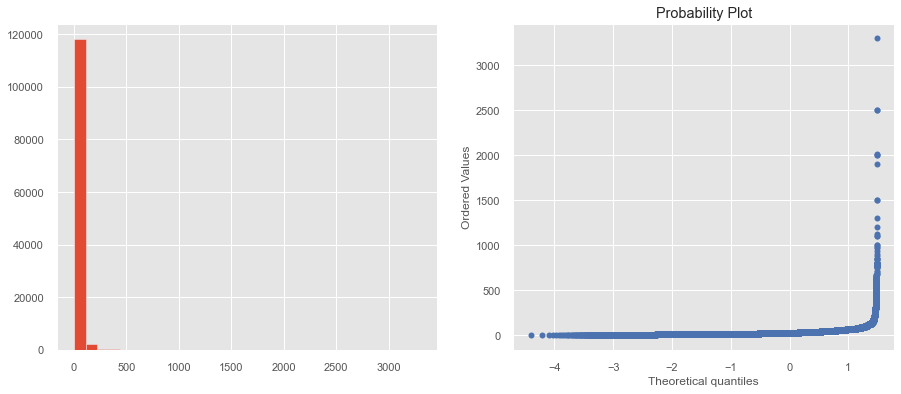

In [158]:
import matplotlib.style as style
 #sets the size of the charts
style.use('ggplot')
def util_plot(dataset, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.plot(markerfacecolor='red')
    dataset[variable].hist(bins=30)
    plt.plot(markerfacecolor='red')
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], fit=True, rvalue=True, dist="norm", plot=plt)
    plt.savefig('price22.svg', bbox_inches='tight')
    plt.show()
util_plot(og_data, 'price')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


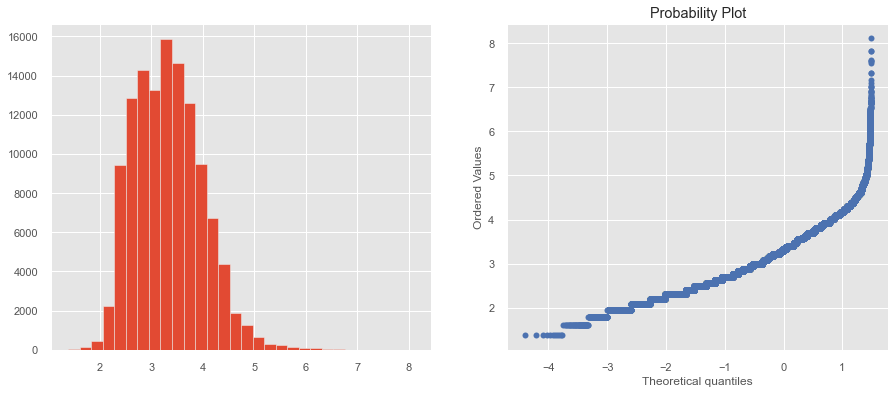

In [159]:
import matplotlib.style as style
 #sets the size of the charts
style.use('ggplot')
def util_plot(dataset, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.plot(markerfacecolor='red')
    dataset[variable].hist(bins=30)
    plt.plot(markerfacecolor='red')
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], fit=True, rvalue=True, dist="norm", plot=plt)
    plt.savefig('price22.svg', bbox_inches='tight')
    plt.show()
    
og_data['price'] = np.log(og_data['price'])
util_plot(og_data, 'price')